In [17]:
!pip uninstall jupyter_contrib_nbextensions

^C


# Cardiovascular Disease Prediction using Machine Learning - SMOTE Balanced Approach

In this project, we predict the possibility of (cardiovascular) heart disease in individuals. It on predicting the likelihood of **Cardiovascular Disease (CVD)** in individuals using **Machine Learning (ML)** models. The goal is to develop an explainable and effective model that assists healthcare professionals in making informed decisions regarding patient risk.

**This notebook serves as an experimental approach designed to identify and analyze the impact of SMOTE (Synthetic Minority Over-sampling Technique) on the model. The primary objective is to understand how SMOTE influences various performance metrics and overall model behavior. The model development process utilizes the original notebook titled "Framingham Code Class Original Dataset.ipynb," which forms the basis for comparison and evaluation.**

By incorporating SMOTE, the notebook aims to address class imbalance issues within the dataset. The synthetic sampling technique generates additional samples for the minority class, thereby providing a more balanced dataset for training the model. This approach is expected to enhance the model's performance by ensuring better representation of all classes.


Github link:

Google Colab Link:

User Video Guide Link:

## Table of Contents
1. [Introduction](#Introduction)
2. [Exploratory Data Analysis](#EDA)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Feature Engineering and Selection](#Feature-Selection)
5. [Cross Validation](#Cross-Validation)
6. [Model Development](#Model-Development)
7. [Risk Stratification](#Risk-Stratification)
8. [Observations and Insights](#Insights)
9. [Conclusion](#Conclusion)

## 1. Introduction and Objectives <a id="Introduction"></a>

This project aims to leverage the power of machine learning (ML) to develop a robust and interpretable predictive model for CVD. By incorporating Explainable AI (XAI) techniques, the model strives to address the "black-box" nature of traditional ML models, enhancing the trust and understanding of healthcare professionals. Additionally, the integration of risk stratification will provide a comprehensive assessment of patient risk levels, ensuring actionable insights for clinical decision-making. <br />

Objectives
- O1: Conduct a detailed study on cardiovascular diseases - Research and understand the
basic concepts of CVD and its risk factors. <br />
- O2: Perform Exploratory Data Analysis (EDA)- Apply appropriate data preprocessing techniques to ensure the dataset used in this study is of high quality. <br />

- O3: Evaluate Established Machine Learning Models- Investigate and evaluate the suitability of various models, such as Logistic Regression, Random Forests, and Deep learning techniques, for predicting cardiovascular disease. <br />
- O4: Optimal Feature Selection- Identify significant predictive features whose presence improves the accuracy of CVD prediction. <br />
- O5: Machine Learning Model Development- Develop a model for predicting cardiovascular diseases with various ML algorithms, deep learning techniques, and risk stratification. <br />
- O6: Model Performance Evaluation- Evaluate the developed model to check its predictive accuracy and interpretability by employing relevant evaluation metrics.


### Attribute Description

Demographics
- **male**: (1 = Male, 0 = Female)
- **age**: Age of the individual
- **education**: Level of education </br>

Medical factors
- **BPMeds**:  (1 = Taking blood pressure medication, 0 = Not taking)
- **prevalentStroke**: (1 = History of stroke, 0 = No history)
- **prevalentHyp**: (1 = History of hypertension, 0 = No history)
- **diabetes**: (1 = Diagnosed with diabetes, 0 = Not diagnosed)
- **totChol**: Total cholesterol level (mg/dL)
- **sysBP**: Systolic blood pressure (mmHg)
- **diaBP**: Diastolic blood pressure (mmHg)
- **BMI**: Body Mass Index (BMI) of the individual
- **heartRate**: Resting heart rate (beats per minute)
- **glucose**: Blood glucose level (mg/dL) </br>

Lifestyle factors
- **currentSmoker**:(1 = Current smoker, 0 = Non-smoker)
- **cigsPerDay**: Number of cigarettes smoked per day </br>

Target variable
- **TenYearCHD**: Binary target variable (1 = Individual developed CHD within 10 years, 0 = Did not develop CHD)


### Importing Libraries

In [60]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from sklearn.metrics import (
    roc_auc_score, f1_score, accuracy_score, classification_report, confusion_matrix, 
    ConfusionMatrixDisplay, precision_recall_curve, roc_curve, recall_score, precision_score
)
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.inspection import permutation_importance
import shap
import lime
import lime.lime_tabular
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, Flatten, Input, LayerNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import hvplot.pandas
import scipy.stats as stats
import time
from xgboost import XGBClassifier

In [62]:
# Import the dataset
heart_data = pd.read_csv('data/framingham.csv')
# Print the first 10 lines of the dataset
print(heart_data.head(10)) 


   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  2

### Data Integrity and Basic Statistics
Ensuring data integrity and understanding basic statistics are crucial steps in the data processing pipeline. These steps help in identifying and addressing any issues in the dataset, ensuring that the data is clean, reliable, and ready for analysis.


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
# Checking the data shape
heart_data.shape

(4240, 16)


The dataset has 4240 rows and 16 columns for different attributes. In the next step, we check for missing values in the data.

In [4]:
# Check for Missing Values
print("Missing Values:\n", heart_data.isnull().sum())

Missing Values:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [64]:
# Remove rows with missing values
heart_data = heart_data.dropna()

# Verify if all missing values are removed
print("Missing Values After Removal:\n", heart_data.isnull().sum())


Missing Values After Removal:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


There are missing values in certain attributes like education, cigsPerDay, BPMeds, totChol, BMI, heartRate and glucose.
Total number of missing values is 645. As it conforms to a small weightage of the total dataset, the missing values are removed.

In [29]:
# Check for duplicate records
duplicates = heart_data.duplicated().sum()
print(f"\nDuplicate Records Found: {duplicates}")

# Remove duplicates if any exist
if duplicates > 0:
    heart_data = heart_data.drop_duplicates()
    print("Duplicates Removed!")


Duplicate Records Found: 0


Data Integrity Review </br>

- The main information, first 10 lines and the shape of the dataset were examined. </br>
- Missing Values Analysis: Checked for missing values across all features. </br>
Key Findings: Some attributes contained missing values.  </br>
Action Taken: Missing values were either imputed using median values or removed if necessary to maintain data consistency.  </br>

- Duplicate Records Detection </br>
Key Findings: No duplicate entries were found. </br>


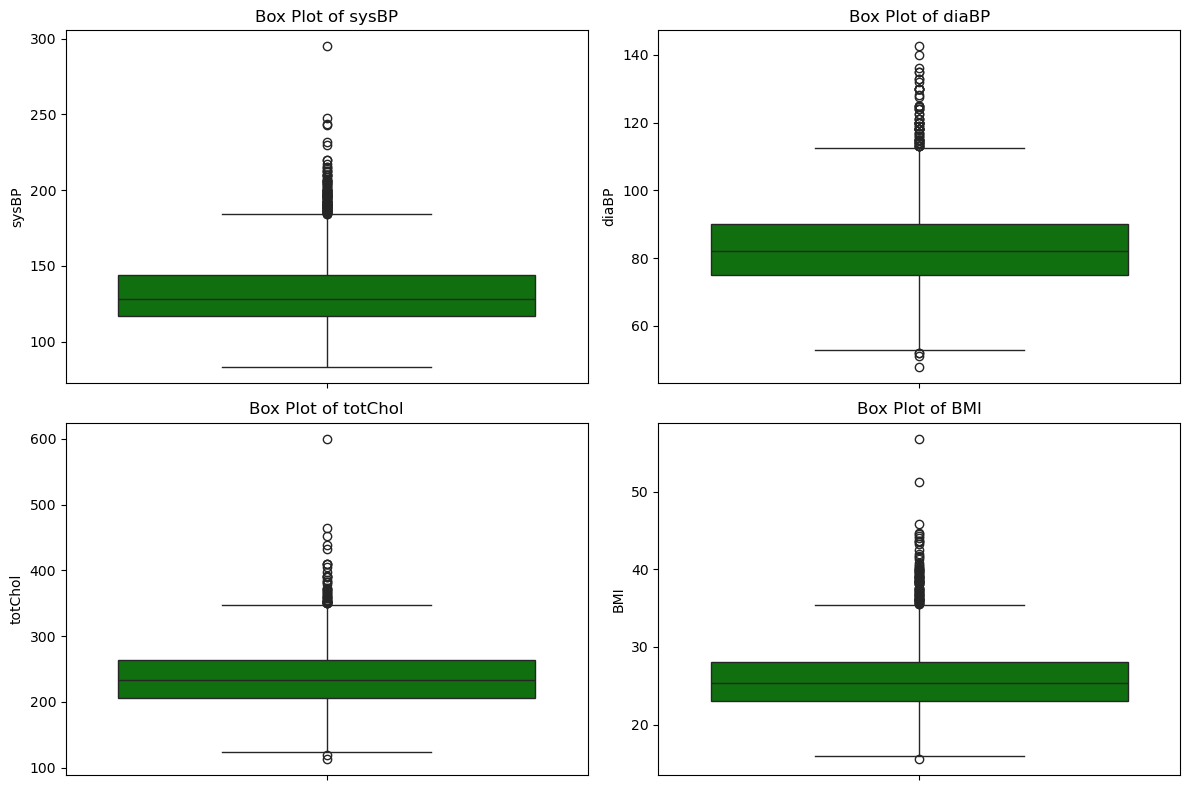

In [21]:
box_columns = ["sysBP", "diaBP", "totChol", "BMI"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(box_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=heart_data[col], color="green")
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()


Key Observations:
Majority of individuals either don’t smoke or smoke very little. There are outliers exceeding 60 cigarettes per day, indicating heavy smokers.

The cholesterol distribution appears centered around 200–250 mg/dL. Several outliers exist beyond 400 mg/dL, indicating individuals with high cholesterol levels. Glucose levels exhibit some outliers exceeding 200 mg/dL, which may suggest undiagnosed or uncontrolled diabetes.

Systolic BP is highly variable, with several outliers exceeding 200 mmHg. Diastolic BP also has some outliers beyond 120 mmHg, confirming that some individuals suffer from hypertension. Heart rate shows a normal distribution, centered around 60–90 bpm.


Overall Conclusion:
The presence of outliers in BP, cholesterol, and glucose highlights high-risk individuals in the dataset.

## 2. Exploratory Data Analysis <a id="EDA"></a>

Exploratory Data Analysis (EDA) is a critical step in understanding the structure, relationships, and patterns in the dataset. Below, we perform detailed analyses using statistics, visualizations, and correlation heatmaps to uncover key insights about the heart disease dataset.

In [31]:
# Statistical measure of data
pd.set_option("display.float", "{:.2f}".format)
heart_data.describe()

male     age  education  currentSmoker  cigsPerDay  BPMeds  \
count 3658.00 3658.00    3658.00        3658.00     3658.00 3658.00   
mean     0.44   49.55       1.98           0.49        9.03    0.03   
std      0.50    8.56       1.02           0.50       11.92    0.17   
min      0.00   32.00       1.00           0.00        0.00    0.00   
25%      0.00   42.00       1.00           0.00        0.00    0.00   
50%      0.00   49.00       2.00           0.00        0.00    0.00   
75%      1.00   56.00       3.00           1.00       20.00    0.00   
max      1.00   70.00       4.00           1.00       70.00    1.00   

       prevalentStroke  prevalentHyp  diabetes  totChol   sysBP   diaBP  \
count          3658.00       3658.00   3658.00  3658.00 3658.00 3658.00   
mean              0.01          0.31      0.03   236.85  132.37   82.92   
std               0.08          0.46      0.16    44.10   22.09   11.97   
min               0.00          0.00      0.00   113.00   83.50   48.00   
25%               0.00          0.00      0.00   206.00  117.00   75.00   
50%               0.00          0.00      0.00   234.00  128.00   82.00   
75%               0.00          1.00      0.00   263.00  143.88   90.00   
max               1.00          1.00      1.00   600.00  295.00  142.50   

          BMI  heartRate  glucose  TenYearCHD  
count 3658.00    3658.00  3658.00     3658.00  
mean    25.78      75.73    81.85        0.15  
std      4.07      11.98    23.90        0.36  
min     15.54      44.00    40.00        0.00  
25%     23.08      68.00    71.00        0.00  
50%     25.38      75.00    78.00        0.00  
75%     28.04      82.00    87.00        0.00  
max     56.80     143.00   394.00        1.00

##### **Insights**
The dataset consists of 44% males and 56% females, making the gender class relatively balanced. <br>
Age : The dataset contains individuals aged 32 to 70 years, with a median of 49 years. <br>

Cholesterol levels range from 113 to 600 mg/dL.<br>
BPMeds (0.03 mean): Only 3% of the population is on blood pressure medication.<br>
Prevalent Stroke (0.01 mean): Stroke cases are very rare (only 1% of individuals).<br>
31% of individuals have hypertension, which is a significant portion of the dataset.<br>

BMI (Mean: 25.78, Max: 56.80): The average BMI is 25.78, which is considered slightly overweight.  <br>

Only 3% of individuals have diabetes, meaning it's an imbalanced feature. <br>
TenYearCHD (0.15 mean): 15% of individuals have developed CHD (Cardiovascular Disease) within ten years.<br>
The dataset is imbalanced, as 85% did not develop CHD.<br>

Almost half of the population are current smokers.<br>
CigsPerDay (Mean: 9.03, Max: 70):  The median (50%) is 0, meaning at least half of the individuals don’t smoke.<br>
However, some individuals smoke as many as 70 cigarettes per day.<br>


#### Distribution of the Dependent variable

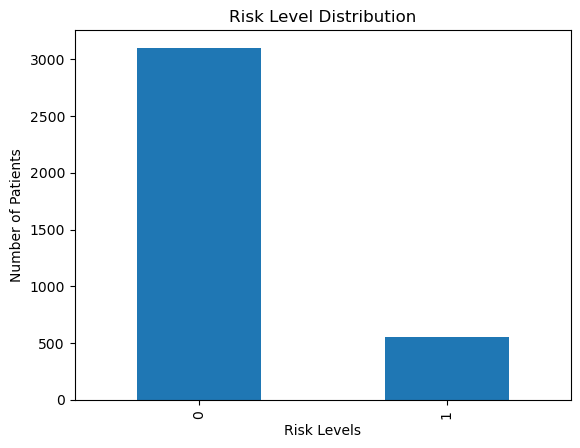

TenYearCHD
0    3101
1     557
Name: count, dtype: int64


In [7]:
# Plot risk level distribution
heart_data['TenYearCHD'].value_counts().plot(kind='bar')
plt.title("Risk Level Distribution")
plt.xlabel("Risk Levels")
plt.ylabel("Number of Patients")
plt.show()
print(heart_data['TenYearCHD'].value_counts())

The above code plots the distribution of the dependent variable TenYearCHD, which indicates the 10-year risk of coronary heart disease (CHD). The bar plot shows the number of patients in each risk level category. There is a class imbalance in the TenYearCHD class.

#### Distribution of Continous variable

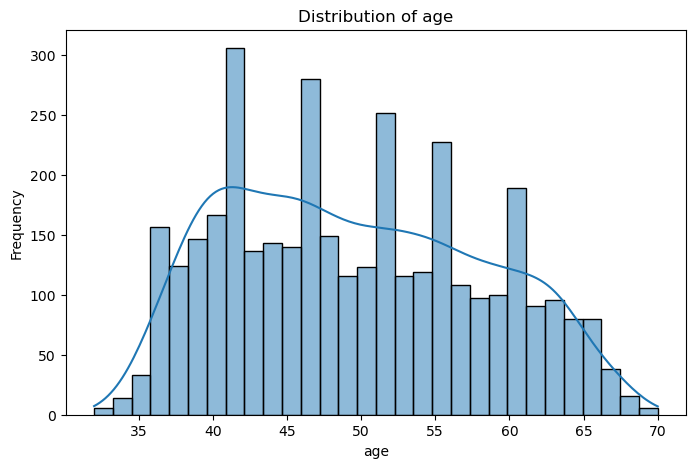

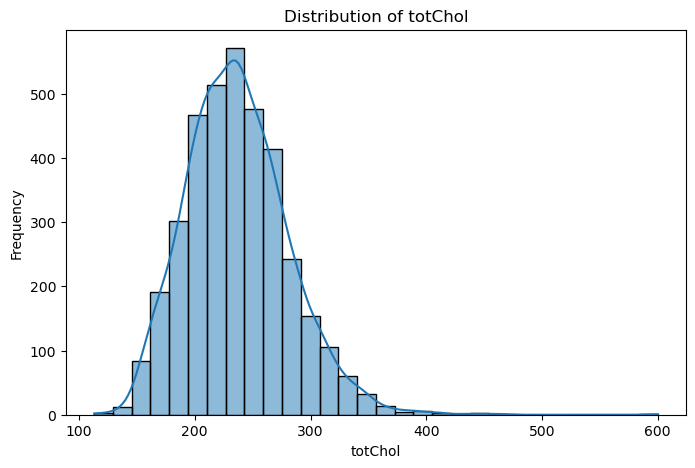

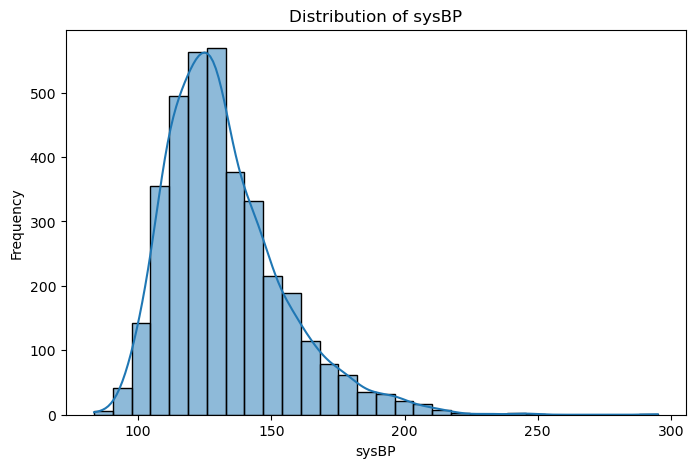

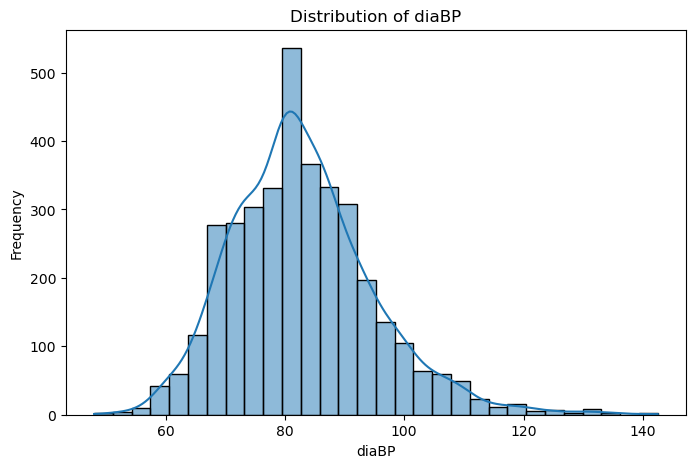

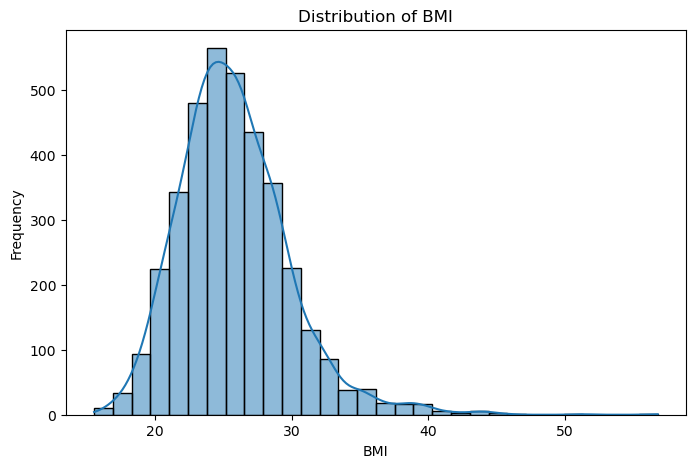

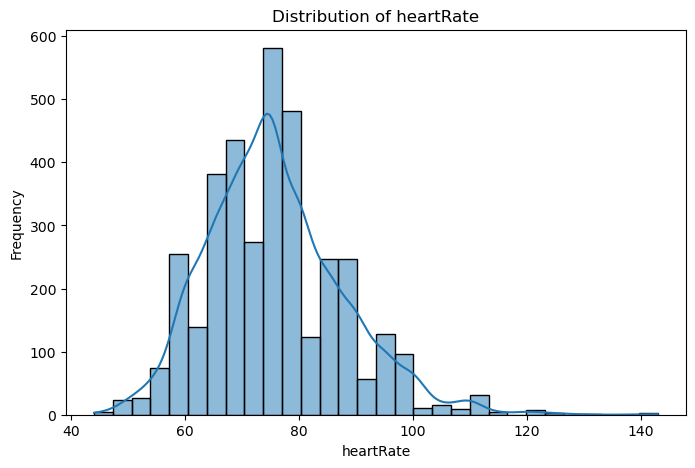

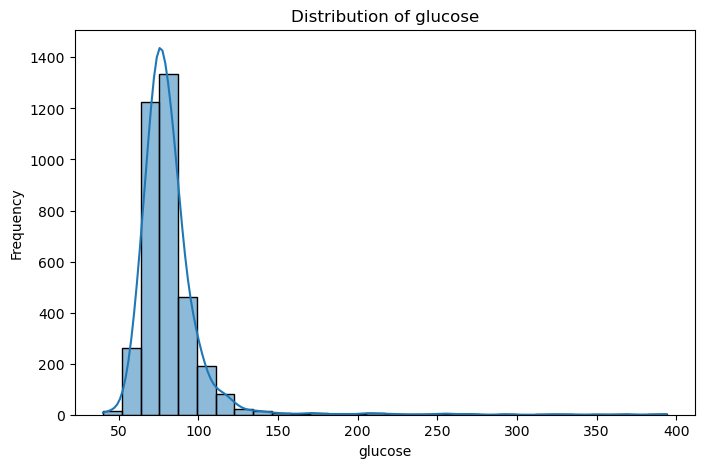

In [10]:
# Distribution of key numeric features
key_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate','glucose']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(heart_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

The visualization provides a visual representation of the distribution of values in the continous variable in the dataset. This enables the reader to analyse the data distribution and understand if it follows a normal distribution, skewed to the left or right, or has multiple peaks. It can also help to identify outliers and anomalies in the data, which can be further investigated and addressed as needed.</br>

Insights </br>
From the graphs, it is shown that most of the continuous variables have a skew towards the left (either slight or high). Some variables have outliers. 

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

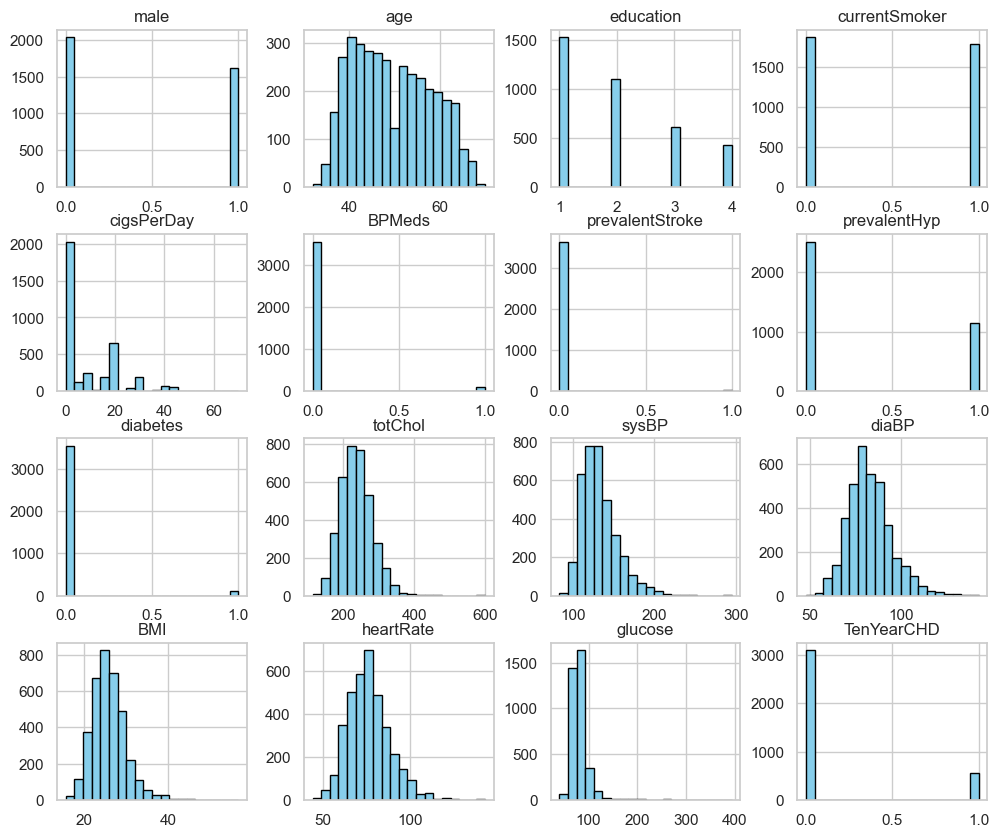

In [48]:
# Histograms to show distribution of attributes
heart_data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

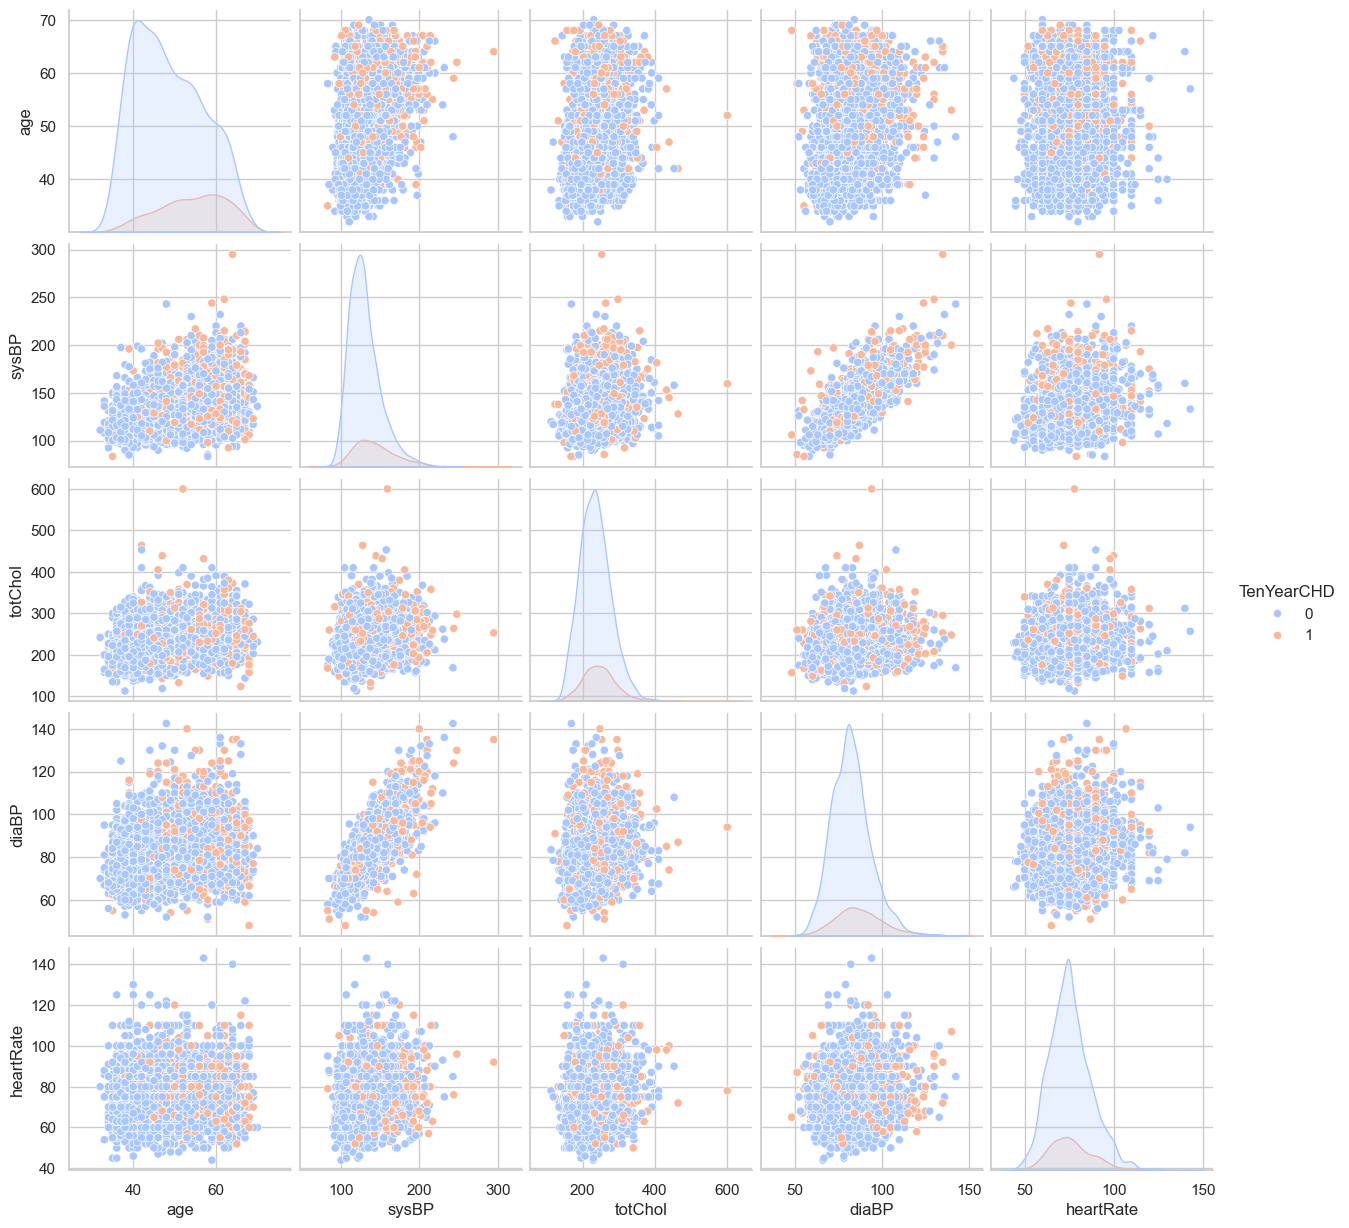

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### Pair Plot: Relationships Between Key Numerical Features
num_features = ["age", "sysBP", "totChol", "diaBP", "heartRate"]
sns.pairplot(heart_data, hue="TenYearCHD", vars=num_features, diag_kind="kde", palette="coolwarm")
plt.show()

##### Insights from histograms 

- Age: The distribution is slightly right-skewed, with most individuals between 40 to 60 years. </br>
- CigsPerDay: The majority of people either don’t smoke or smoke very little. </br>
- TotChol: Roughly normal distribution, centered around 200–250 mg/dL. </br>
- SysBP: Slightly right-skewed, with most values between 110 and 180 mmHg. </br>
- Heart Rate: Normally distributed, with most values around 60–90 bpm.

The pair plot visualizes the relationships between key numerical features, colored by the TenYearCHD variable. This helps identify potential correlations and patterns between features.

#### Box plots 

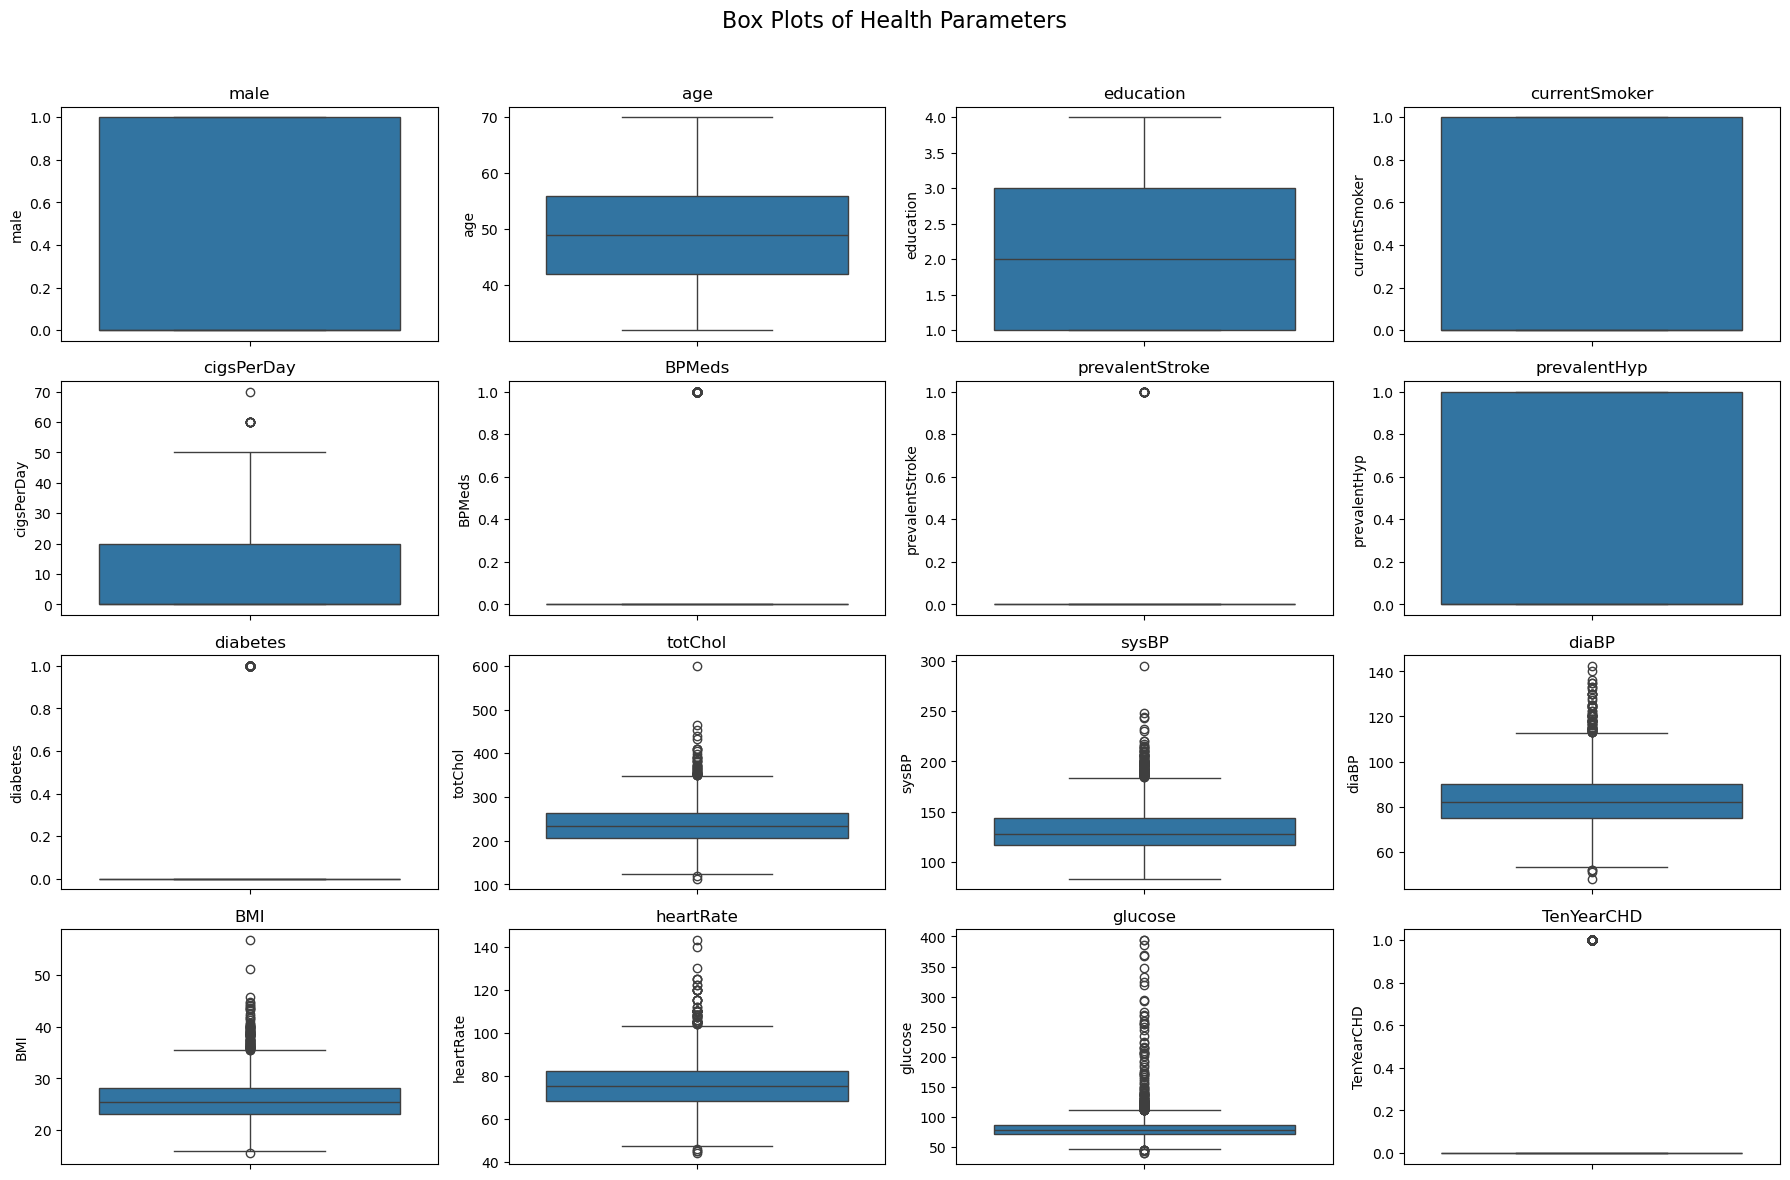

In [13]:
# Creating subplots for better visibility of each feature
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
fig.suptitle("Box Plots of Health Parameters", fontsize=16)

# Loop through the columns and plot each one
for ax, col in zip(axes.flatten(), heart_data.columns):
    sns.boxplot(y=heart_data[col], ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The box plots provide a visual representation of the distribution of each feature, highlighting the median, quartiles, and potential outliers.

#### Relationship between Continous variables and the Dependent variable

##### CVD Risk based on Age and Cholestrol levels
The interactive scatter plot shows the relationship between age and total cholesterol, colored by the TenYearCHD variable or the entire dataset population. The yellow dots depict CVD positive cases and purple dots depict negative cases. Hovering over the points provides additional information about systolic blood pressure. 

In [14]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(heart_data, x='age', y='totChol', color='TenYearCHD',
                 title="CHD Risk by Age and Cholesterol",
                 labels={'age': 'Age', 'totChol': 'Total Cholesterol'},
                 hover_data=['sysBP'],
                 color_continuous_scale='Viridis')
fig.show()


##### 10-Year CHD Risk by Age Group and Gender
The interactive scatter plot shows the relationship between age and total cholesterol, colored by the TenYearCHD variable or the entire dataset population. The yellow dots depict CVD positive cases and purple dots depict negative cases. Hovering over the points provides additional information about systolic blood pressure. 

In [15]:

heart_data['Gender'] = heart_data['male'].map({1: 'Male', 0: 'Female'})

# Create age bins for better visualization
heart_data['Age_Group'] = pd.cut(heart_data['age'], bins=[30, 40, 50, 60, 70, 80],
                                 labels=['30-40', '40-50', '50-60', '60-70', '70-80'])

# Convert Age_Group to string for proper grouping
heart_data['Age_Group'] = heart_data['Age_Group'].astype(str)

# Aggregate data: CHD prevalence by Age Group and Gender, convert to percentage
age_gender_chd = heart_data.groupby(['Age_Group', 'Gender'])['TenYearCHD'].mean().reset_index()
age_gender_chd['TenYearCHD'] *= 100  

# Create an interactive bar chart with CHD risk in %
fig = px.bar(age_gender_chd, 
             x='Age_Group', 
             y='TenYearCHD', 
             color='Gender',
             barmode='group',
             title="10-Year CHD Risk by Age Group and Gender",
             labels={'TenYearCHD': 'Average CHD Risk (%)', 'Age_Group': 'Age Group'},
             text=age_gender_chd['TenYearCHD'].round(2))  # Display risk values in %

# Show the interactive chart
fig.show()


Here we observe that CVD risk increases with age and is more predominant in men in 60-70 age group.

##### Risk Factors across Age Groups 
How risk factors vary by age groups like Adults (30-40), Middle-aged adults (40-50, 50-60), Senior adults (60-70, 70-80)

C:\Users\fathi\AppData\Local\Temp\ipykernel_42952\3662674169.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = heart_data.groupby("Age_Group")[risk_factors].mean()


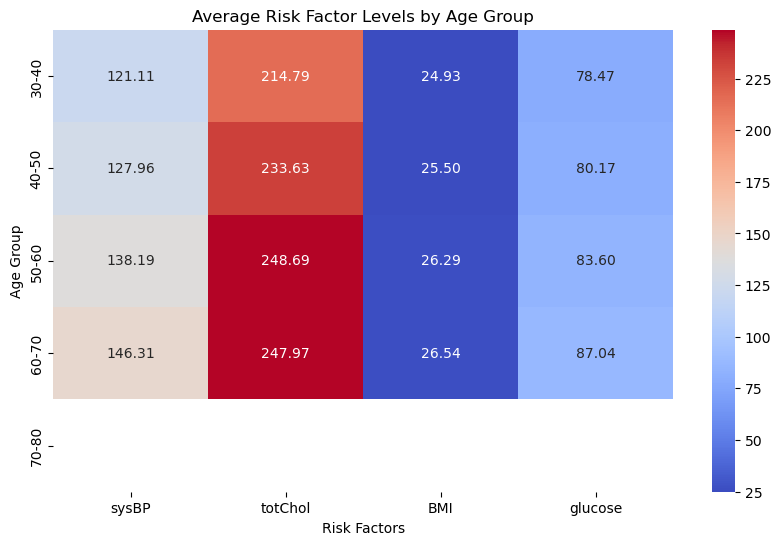

In [11]:
# Bin Age Groups
heart_data['Age_Group'] = pd.cut(heart_data['age'], bins=[30, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])

# Compute Mean Risk Factors
risk_factors = ["sysBP", "totChol", "BMI", "glucose"]
age_group_summary = heart_data.groupby("Age_Group")[risk_factors].mean()

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(age_group_summary, cmap="coolwarm", annot=True, fmt=".2f") 
plt.title("Average Risk Factor Levels by Age Group")
plt.xlabel("Risk Factors")
plt.ylabel("Age Group")
plt.show()

heart_data.drop(columns=['Age_Group'], inplace=True)

##### Insights

1. Systolic blood pressure (sysBP) increases steadily with age:
- 30-40 years: 121.11 mmHg
- 40-50 years: 127.96 mmHg
- 50-60 years: 138.19 mmHg
- 60-70 years: 146.31 mmHg 
This confirms that blood pressure naturally rises with age, putting older individuals at a higher risk of hypertension and cardiovascular complications.
The sharp increase from 50+ years suggests that regular BP monitoring is crucial for middle-aged and older individuals.


2. Total Cholesterol (totChol) levels also rise with age:
- 30-40 years: 214.79 mg/dL
- 40-50 years: 233.63 mg/dL
- 50-60 years: 248.69 mg/dL
- 60-70 years: 247.97 mg/dL 
The increase in cholesterol levels until age 60 is consistent with cardiovascular risk patterns, as cholesterol builds up in arteries over time.
Slight decrease after 60 could be due to individuals adopting cholesterol-lowering medications or dietary changes.


4. Body Mass Index (BMI) has a slight increase in BMI with age:
- 30-40 years: 24.93
- 40-50 years: 25.50
- 50-60 years: 26.29
- 60-70 years: 26.54
The increase in BMI suggests gradual weight gain as individuals age. The BMI values indicate that most individuals are in the overweight category (>25 BMI), increasing their risk for heart disease and diabetes.

5. Blood Glucose rise with age, increasing the risk of diabetes:
- 30-40 years: 78.47 mg/dL
- 40-50 years: 80.17 mg/dL
- 50-60 years: 83.60 mg/dL
- 60-70 years: 87.04 mg/dL
This trend suggests an age-related decline in insulin sensitivity. Individuals aged 50+ are at a higher risk of developing Type 2 diabetes, making early lifestyle interventions essential.

**Final Observations**
All key cardiovascular risk factors (BP, cholesterol, BMI, and glucose) show an increasing trend with age, particularly after 40-50 years.
Regular health screenings, dietary changes, and lifestyle modifications are essential in this age group.
While glucose levels remain within normal limits, the upward trend suggests that preventative care is necessary to reduce diabetes risk in older individuals.

##### Cholestrol, Blood pressure and glucose trends across age

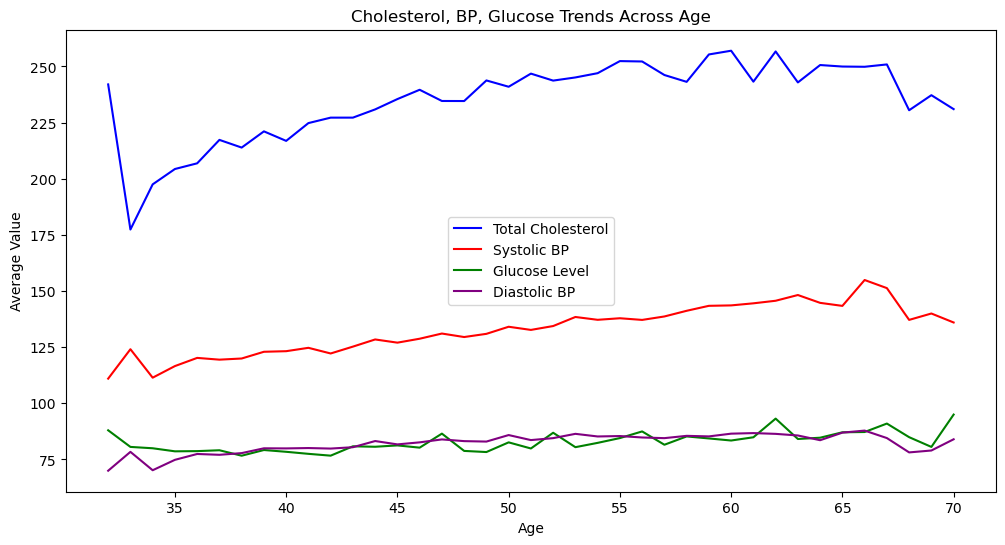

In [10]:
# Group Data by Age 
age_grouped = heart_data.groupby("age").mean()  # Aggregating numerical features by age

# Line Graph: Cholesterol, BP, and Smoking Trends Across Age
plt.figure(figsize=(12, 6))
sns.lineplot(x=age_grouped.index, y=age_grouped['totChol'], label="Total Cholesterol", color="blue")
sns.lineplot(x=age_grouped.index, y=age_grouped['sysBP'], label="Systolic BP", color="red")
sns.lineplot(x=age_grouped.index, y=age_grouped['glucose'], label="Glucose Level", color="green")
sns.lineplot(x=age_grouped.index, y=age_grouped['diaBP'], label="Diastolic BP", color="purple")

plt.title("Cholesterol, BP, Glucose Trends Across Age")
plt.xlabel("Age")
plt.ylabel("Average Value")
plt.legend()
plt.show()

Total cholesterol (blue) increases with age, peaking around 60-65 years, then slightly declining.
Systolic BP (red) gradually rises with age, showing a steady upward trend.
Diastolic BP & Glucose levels (purple & green) remain relatively stable, with minor fluctuations. <br>
Insight: Aging is associated with higher cholesterol and blood pressure, reinforcing the need for monitoring cardiovascular health in older individuals.

##### Cigarettes Per Day vs. Cholesterol

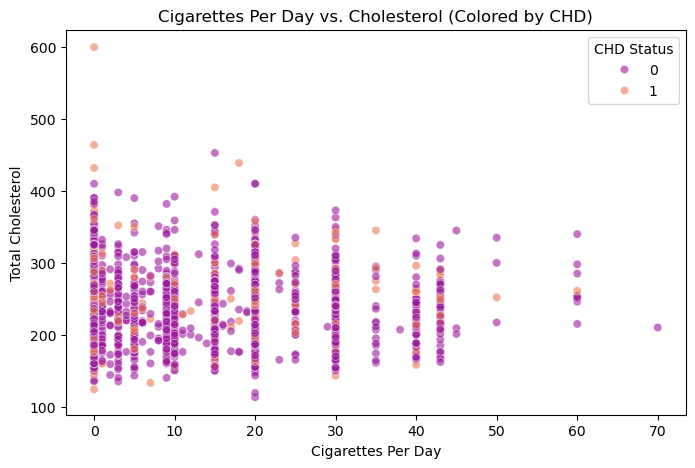

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="cigsPerDay", y="totChol", hue="TenYearCHD", data=heart_data, alpha=0.6, palette="plasma")
plt.title("Cigarettes Per Day vs. Cholesterol (Colored by CHD)")
plt.xlabel("Cigarettes Per Day")
plt.ylabel("Total Cholesterol")
plt.legend(title="CHD Status")
plt.show()



No major correlation exists between cigarette consumption and cholestrol levels.

#####  Heart Rate vs. Systolic Blood Pressure

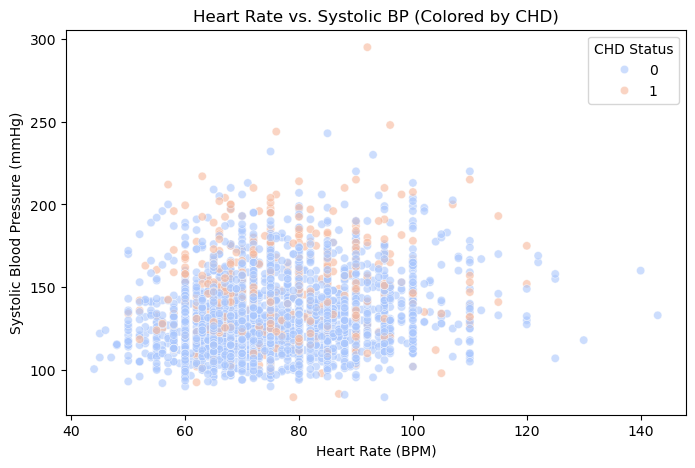

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="heartRate", y="sysBP", hue="TenYearCHD", data=heart_data, alpha=0.6, palette="coolwarm")
plt.title("Heart Rate vs. Systolic BP (Colored by CHD)")
plt.xlabel("Heart Rate (BPM)")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.legend(title="CHD Status")
plt.show()

Higher systolic BP tends to be more common in individuals with CHD (light orange dots).
No strong visible relationship between heart rate and CHD, indicating that other risk factors may be more significant.

#### Distribution between Discrete Variables and the Target Variable

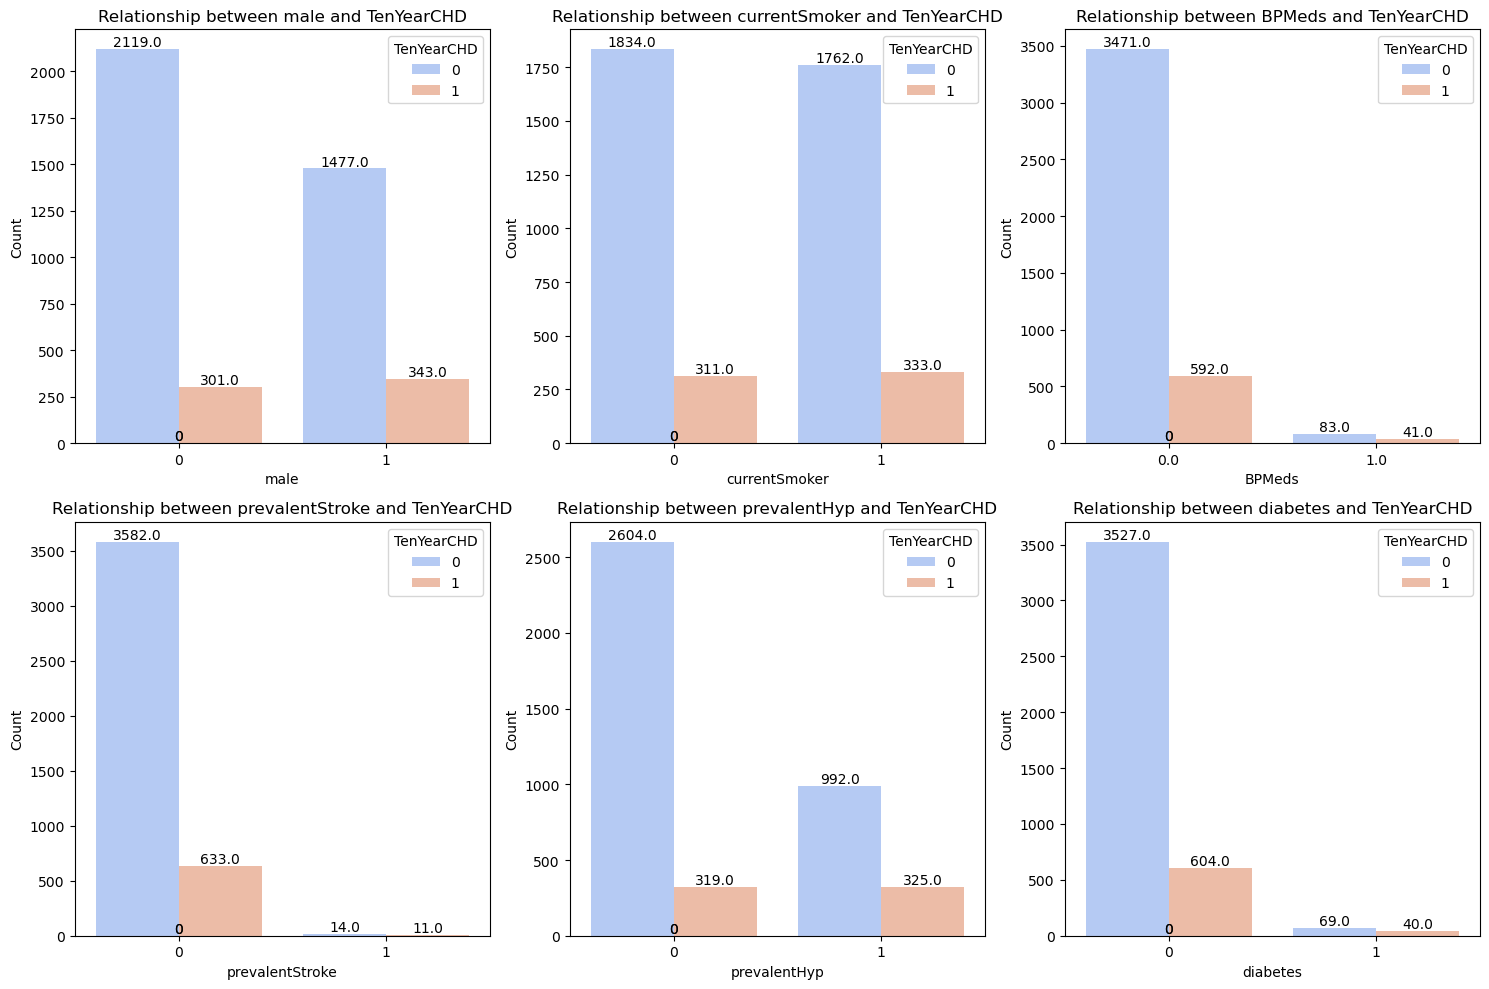

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define discrete categorical variables
discrete_vars = ["male", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
target_var = "TenYearCHD"

# Function to plot the relationship between discrete variables and TenYearCHD
def plot_discrete_vs_target(df, discrete_vars, target_var):
    plt.figure(figsize=(15, 10))
    
    for i, var in enumerate(discrete_vars, 1):
        plt.subplot(2, 3, i)
        ax = sns.countplot(x=var, hue=target_var, data=df, palette="coolwarm")
        plt.title(f"Relationship between {var} and {target_var}")
        plt.xlabel(var)
        plt.ylabel("Count")
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

# Call function to plot the graphs
plot_discrete_vs_target(heart_data, discrete_vars, target_var)


The count plot (bar plot) is chosen for visualizing the relationship between discrete (categorical) independent variables and the dependent variable (TenYearCHD)</br>

Insights from the graph</br>
Smoking and CHD Risk</br>
The number of smokers (is_smoking=1) with CHD is similar to that of non-smokers.
This suggests that smoking alone might not be the strongest indicator of CHD, but could be a contributing factor when combined with other variables.</br>

Hypertension and CHD Risk</br>
Individuals with a history of hypertension (prevalentHyp=1) have a much higher rate of CHD.
This aligns with medical knowledge, as high blood pressure is a well-known risk factor for heart disease.

Previous history of stroke and CHD Risk</br>
Individuals without a history of stroke (prevalentStroke=0) have a much lesser rate of CHD. This doesn't indicate that people with no history of stroke will not be affected by CVD. 633 individuals from the dataset are CVD positive even with no history of stroke.

#### Correlation Heatmap
A correlation heatmap is a visualization tool that displays the correlation between multiple variables as a colour-coded matrix.

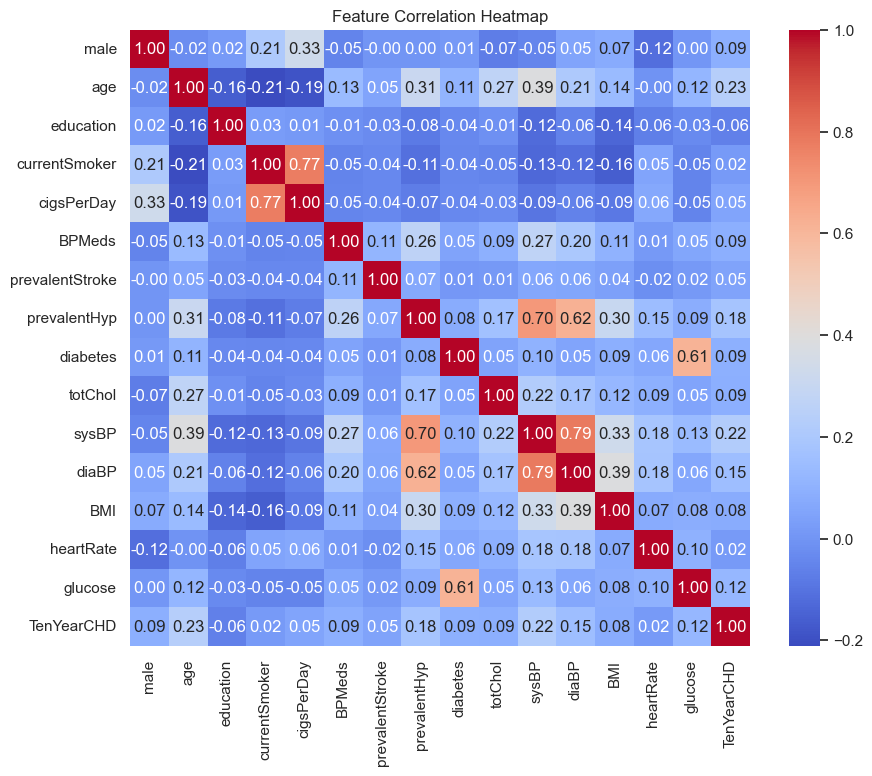

In [22]:
columns_to_drop = ['Gender', 'Age_Group', 'FraminghamRisk', 'RiskCategory'] # Dropping the engineered columns
existing_columns = [col for col in columns_to_drop if col in heart_data.columns]
heart_data = heart_data.drop(columns=existing_columns, errors='ignore')  # Ignores missing columns

# Convert all columns to numeric where possible
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Below is another visualization of various attribues with the target variable `TenYearCHD`

In [16]:
# Select numeric data
numeric_data = heart_data.select_dtypes(include=['float64', 'int64'])

# Compute correlations with 'TenYearCHD'
correlations = numeric_data.drop('TenYearCHD', axis=1).corrwith(numeric_data['TenYearCHD'])

# Plot correlation using hvplot
correlations.hvplot.barh(
    width=600, height=400,
    title="Correlation between Heart Disease and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

##### **Feature Correlation Analysis**

The correlation heatmap visually represents the relationships between various features in the dataset. It highlights both positive and negative correlations, which can be used to select significant predictors for the model. Features with strong correlations (positive or negative) with the target variable (`TenYearCHD`) are crucial for prediction.

##### **Key Observations**:
1. **Strong Correlations**:
   - `Age` shows a high positive correlation with the target variable (`TenYearCHD`), indicating people who are older have more risk of heart disease.
   - `sysBP` and `prevalentHyp ` also show a slight positive correlation with `TenYearCHD`.
   - `sysBP` and `diaBP` are strongly correlated with each other.

2. **Negative Correlations**:
   - `education` has a  negative correlation with `TenYearCHD`, suggesting an inverse proportion.

3. **Low or Neutral Correlations**:
   - Features like `heartRate` and `currentSmoker` have weaker correlations with the target variable.

#### Hypothesis Testing

Hypothesis Test: Does Hypertension Increase CHD Risk? <br>
Hypothesis Statement<br>
Null Hypothesis (H₀): There is no significant difference in the proportion of CHD cases between people with and without hypertension.<br>
Alternative Hypothesis (H₁): People with hypertension have a significantly higher risk of CHD.<br>
Test Used: Chi-Square Test for Independence<br>
Since both prevalentHyp (hypertension) and TenYearCHD (CHD risk) are categorical variables, we use a Chi-Square test.



In [32]:
# Create contingency table
contingency_table = pd.crosstab(heart_data['prevalentHyp'], heart_data['TenYearCHD'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print("Hypothesis Test: Does Hypertension Increase CHD Risk?")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p_value:.5f}")

# Interpretation
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("Reject the Null Hypothesis:There is a significant association between Hypertension and CHD risk.")
else:
    print("*Fail to Reject the Null Hypothesis: No significant association between Hypertension and CHD risk.")


Hypothesis Test: Does Hypertension Increase CHD Risk?
Chi-Square Statistic: 119.27
P-Value: 0.00000
Reject the Null Hypothesis:There is a significant association between Hypertension and CHD risk.


As the p value is not less than alpha, we reject the Null Null Hypothesis as there is a significant association between Hypertension and CHD risk at 5% significance level.

#### Exploratory Data Analysis (EDA) Summary
The EDA provided a detailed insight into the Framingham Heart Study dataset, allowing us to understand the distribution of key variables, identify patterns, and uncover relationships between different cardiovascular risk factors to help us in model developement.

**Dataset Overview**
The dataset consists of 4,240 records and 16 features, including demographic, lifestyle, and medical attributes.
The target variable, TenYearCHD, is imbalanced, with only 15% of individuals developing CHD within 10 years.
The dataset contains 44% males and 56% females, indicating a relatively balanced gender distribution.

**Key Insights from Data Distribution**
Age Distribution: Right-skewed, with most individuals between 40 and 60 years.
Total Cholesterol & Blood Pressure: Cholesterol levels are normally distributed around 200–250 mg/dL, while systolic BP shows an increasing trend with age.
Smoking Behavior: While almost half of the individuals are smokers, the number of cigarettes smoked per day varies widely (some individuals smoking up to 70 cigarettes per day).
Body Mass Index (BMI): The mean BMI is 25.78, categorizing most individuals as slightly overweight.

**Correlation & Feature Importance**
Age, systolic BP (sysBP), and hypertension (prevalentHyp) show a strong positive correlation with CHD.
Diastolic BP (diaBP) and total cholesterol (totChol) have moderate correlations with CHD.
Education has a negative correlation, suggesting an inverse relationship between education level and CHD risk.
Low or Neutral Correlations: Features like heart rate and current smoker status exhibit weak relationships with CHD.

**Risk Stratification Findings**
Older individuals (50+) show a significantly higher CHD risk, as seen in the age-group vs. CHD analysis.
Males have a higher CHD risk compared to females across all age groups.
Systolic BP and cholesterol levels increase with age, reinforcing their role as key risk factors.

**Hypothesis Testing Results**
Hypertension and CHD Risk: A chi-square test confirmed a significant association between hypertension and CHD, reinforcing that individuals with hypertension are at higher risk.
Previous Stroke History and CHD: While stroke history is rare in the dataset, individuals with no stroke history still develop CHD, highlighting the importance of other risk factors.

**Visual Analysis**
Boxplots identified outliers in cholesterol, systolic BP and glucose.
Pair Plots: Showed potential non-linear relationships between risk factors.
CHD Risk by Age & Cholesterol: Cholesterol levels peak at 60-65 years, followed by a decline.
CHD Risk by Smoking: No strong correlation between cigarette consumption and cholesterol levels, suggesting smoking may act as an indirect risk factor when combined with other attributes.

**Final Conclusion**
The EDA findings validate the medical understanding of cardiovascular disease risk, where age, blood pressure, and cholesterol are primary predictors of CHD. The dataset's class imbalance highlights the importance of precision in model training, and feature selection ensures that only significant variables are used in predictive modeling. The insights derived from EDA will guide feature engineering, model selection, and evaluation in the subsequent phases of this study.


## 3. Data Processing  <a id="Data-Preprocessing"></a>

After exploring the dataset and understanding how the variables corrleate with each other, the following preprocessing steps were carried out.
#### **1. Handling Missing Values**
- Rows or columns with significant missing values were removed to avoid introducing bias into the model.
- **Justification**: Imputation techniques were considered but not implemented due to potential distortion in small datasets. Eliminating incomplete data ensures that the model trains on accurate information.

#### **2. Splitting the Dataset**
- The dataset was split into training and testing sets (80% training, 20% testing).
- **Justification**: This ensures that the model can generalize to unseen data, allowing for reliable evaluation of its performance.

#### **3. Feature Scaling**
- Standardization was applied to scale features like cholesterol and blood pressure to have a mean of zero and a standard deviation of one.
- **Justification**: Scaling ensures that the gradient-based optimization processes during model training converge more efficiently.

#### **4. Separation**
- Separating the columns into the features (X) and target variable (y).

#### **5. Dropping columns**
- We dropped the rows with missing values. Since education column does not affect the dataset significantly and has a negative correlation, we remove that column.

In [66]:
# Drop 'education' column
heart_data.drop(columns=['education'], inplace=True)

from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = heart_data.drop(columns=["TenYearCHD"]) 
y = heart_data["TenYearCHD"] 

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Standardize continuous variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, "model/scaler_framingham.pkl")
# K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Output Dataset Shapes
print("Full Dataset Shape:", X.shape)
print("Training Dataset Shape:", X_train.shape)
print("Testing Dataset Shape:", X_test.shape)

Full Dataset Shape: (3658, 14)
Training Dataset Shape: (4961, 14)
Testing Dataset Shape: (1241, 14)


C:\Users\fathi\AppData\Local\Temp\ipykernel_69144\726894923.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")


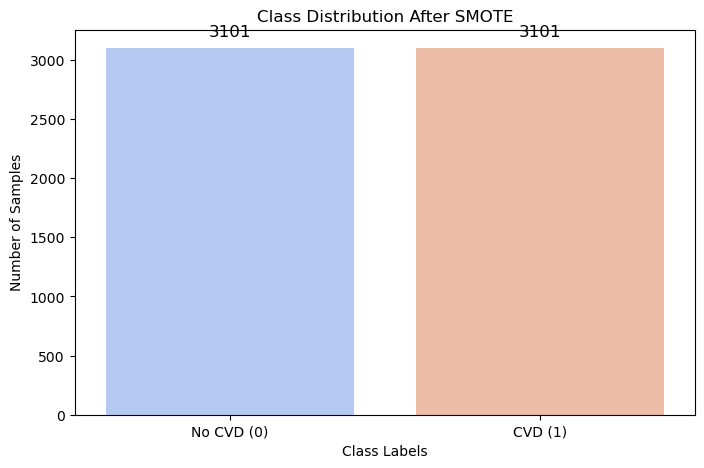

In [13]:
from collections import Counter

# Count class distribution after SMOTE
class_counts = Counter(y_resampled)

# Plot bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")
# Labeling
plt.xticks([0, 1], ["No CVD (0)", "CVD (1)"])
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution After SMOTE")

# Show values on bars
for i, v in enumerate(class_counts.values()):
    plt.text(i, v + 100, str(v), ha='center', fontsize=12)
plt.show()

Hence, we manually verify the size of the original dataset followed by the training and testing dataset.

## 4. Feature Engineering and Selection  <a id="Feature-Selection"></a>
Feature importance helps us understand which features have the most influence on the predictions made by the model. In this case, we used an XGBoost classifier to determine the importance of various features in predicting the 10-year risk of coronary heart disease (CHD). 

C:\Users\fathi\AppData\Local\Temp\ipykernel_59608\1186157853.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="Blues_r")


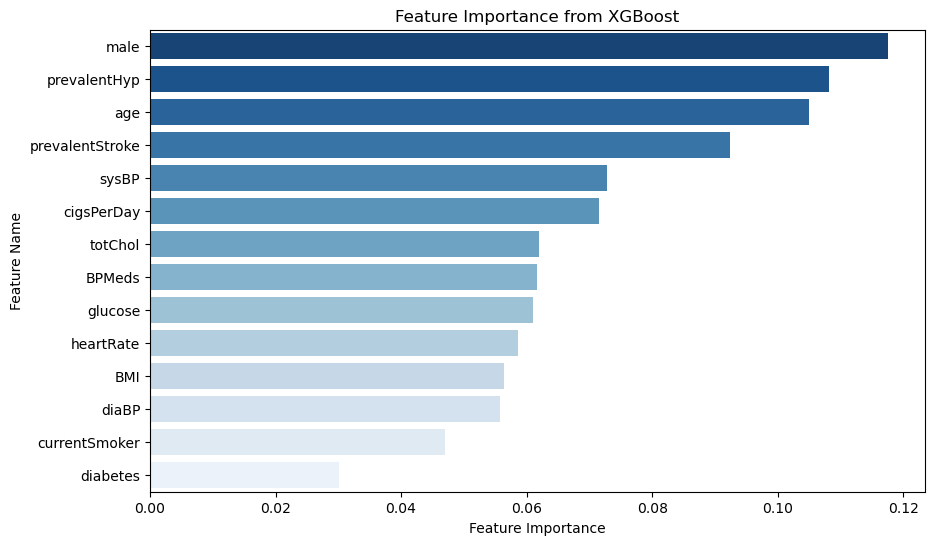

            Feature  Importance
0              male    0.117601
6      prevalentHyp    0.108248
1               age    0.104986
5   prevalentStroke    0.092382
9             sysBP    0.072808
3        cigsPerDay    0.071526
8           totChol    0.061962
4            BPMeds    0.061577
13          glucose    0.061001
12        heartRate    0.058628
11              BMI    0.056337
10            diaBP    0.055814
2     currentSmoker    0.046951
7          diabetes    0.030179


In [45]:
# Train XGBoost model to get feature importance
xgb_model = XGBClassifier()
xgb_model.fit(X, y)

# Extract feature importances
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Sort and plot
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="Blues_r")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance from XGBoost")
plt.show()

# Print sorted importance values
print(feature_importance_df)

Male (0.117601): Gender is the most important feature, indicating that being male significantly increases the risk of CHD. This aligns with medical research showing that men are generally at higher risk for heart disease compared to women.

Prevalent Hypertension (0.108248): The presence of hypertension is a critical factor in predicting CHD risk. High blood pressure can damage arteries and lead to heart disease.

Age (0.104986): Age is a major risk factor, with older individuals being more likely to develop CHD. This is consistent with the understanding that the risk of heart disease increases with age.

Prevalent Stroke (0.092382): A history of stroke is a significant predictor of CHD risk. Individuals who have had a stroke are more likely to have underlying cardiovascular issues.

Systolic Blood Pressure (0.072808): Higher systolic blood pressure is associated with an increased risk of CHD. This measure reflects the pressure in the arteries when the heart beats.

In [47]:
#  SelectKBest Using Chi-Squared Test
# Note: Chi-squared requires non-negative data,  normalization is done
from sklearn.feature_selection import chi2,SelectKBest
chi2_selector = SelectKBest(chi2, k=5)  # Select top 5 features
chi2_selector.fit(X, y)

chi2_selected_features = X.columns[chi2_selector.get_support()]
print("\nSelected Features by Chi-Squared Test:\n", chi2_selected_features)


Selected Features by Chi-Squared Test:
 Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'], dtype='object')


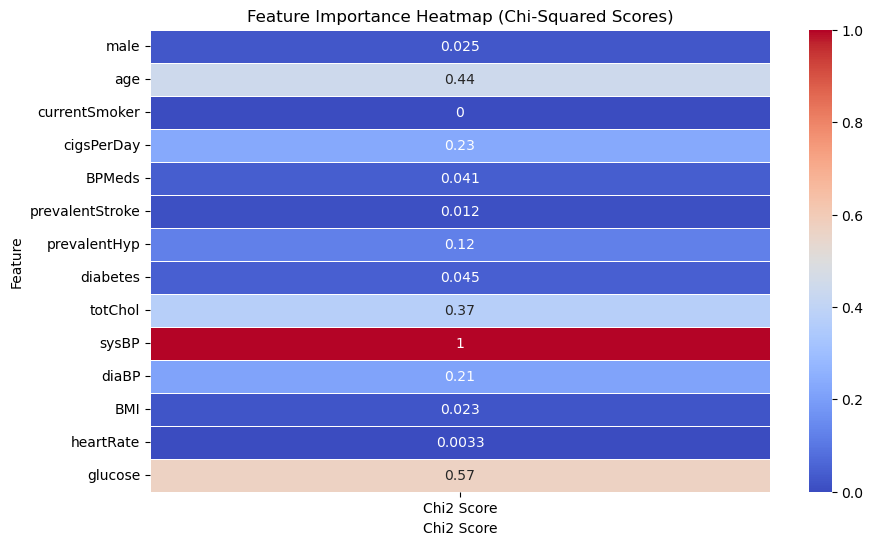

In [53]:
# Select top 5 features using Chi-Squared test
chi2_selector = SelectKBest(chi2, k=5)
chi2_selector.fit(X, y)

# Get Chi-Squared scores and normalize them
chi2_scores = chi2_selector.scores_
scaled_scores = MinMaxScaler().fit_transform(chi2_scores.reshape(-1, 1)).flatten()

# Create a DataFrame with feature names and scores
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': scaled_scores})

# Fix: Set index for heatmap
feature_scores_df.set_index("Feature", inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(feature_scores_df, annot=True, cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("Feature Importance Heatmap (Chi-Squared Scores)")
plt.ylabel("Feature")
plt.xlabel("Chi2 Score")
plt.show()


'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'. <br>
These features likely have a strong relationship with the target variable.

Age shows the highest feature importance, making it a significant predictor for heart disease. <br>
Both methods highlight overlapping features (age, sysBP , glucose), validating their importance for prediction.

Risk Stratification will be directly implemented in the app deployment file named app.py

Dimensionality reduction is not implemented because the dataset has a relatively small number of features compared to the number of samples, hence the risk of overfitting is low. Additionally, the dataset is relatively small, so the training time for machine learning models would not be a significant issue.

## 5. Cross Validation <a id="Cross-Validation"></a>

In this example, StratifiedKFold is initialized with 5 splits, shuffling the data before splitting, and a fixed random state for reproducibility.

In [35]:
# Define Stratified K-Fold (Ensures class balance in each fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## 6. Model Development  <a id="Model-Development"></a>
In this section, we develop and explore the performance of 6 different models. The models explored and the reason for choosing them is mentioned below. </br>
1. Logistic Regression- Baseline model; interpretable, suitable for binary classification & simple
2. Random Forest - Handles non-linearity & feature importance by helping in understanding key risk factors.
3. Decision Trees- Easy to interpret, low computation cost
4. Ensemble Model- Combines the advantages of 3 baseline models
5. Fully Connected Neural Network- Captures complex patterns, flexible learning
6. 1Dimensional Convolutoonal Neural Network-  Captures complex patterns, flexible learning in 1D tabular data

Each model is developed and evaluated using a classification report displaying its performance metrics, confusion matrix and ROC AUC curve. Additionally, the training and prediction time of each model is recorded to analyse the computational efficiency.
For finding the best set of parameters that works, hyperparameter tuning is implemented using GridSearchCV. 

### 6.1 Logistic Regression


 Training Time: 0.038207 seconds
 Prediction Time: 0.000989 seconds
Logistic Regression - Mean F1 Score: 0.7191
New Decision Threshold: 0.53
Logistic Regression (Test Set):
              precision    recall  f1-score   support

           0       0.78      0.45      0.57       621
           1       0.61      0.87      0.72       620

    accuracy                           0.66      1241
   macro avg       0.69      0.66      0.64      1241
weighted avg       0.69      0.66      0.64      1241


Logistic Regression Model Performance
 Accuracy: 0.6591
 Recall: 0.8710
 Precision: 0.6116
 F1 Score: 0.7186
 AUC-ROC: 0.7319


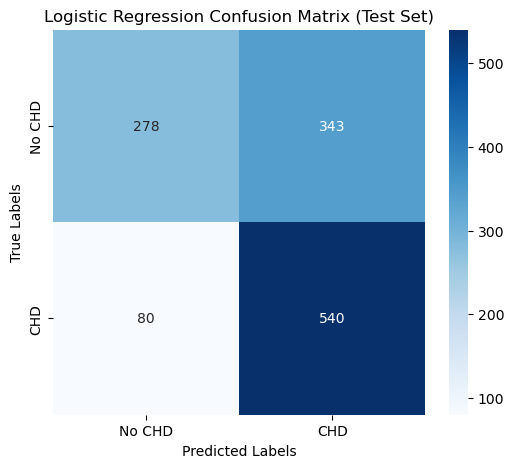

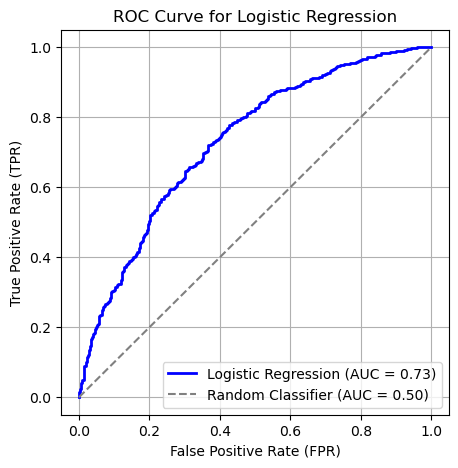

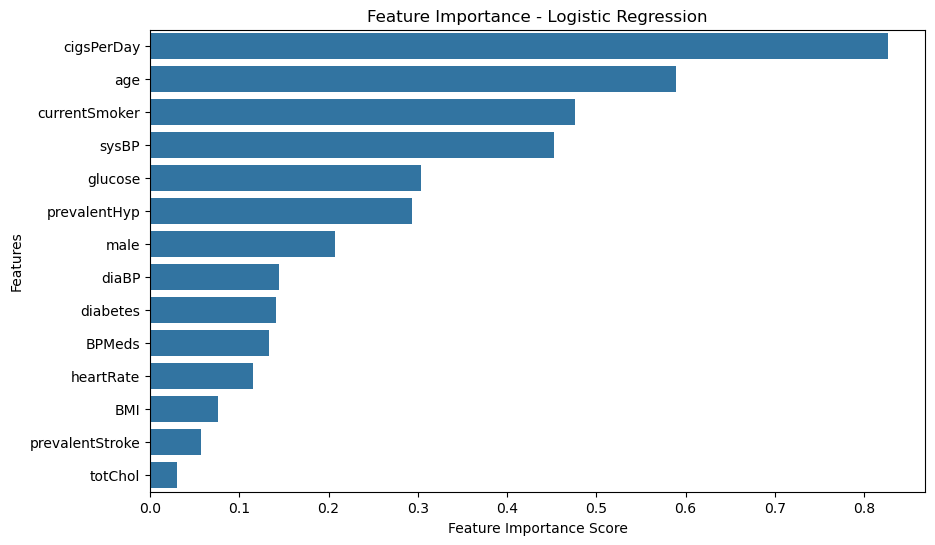

In [15]:
# Define Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression Model (Before Training)
logistic_model = LogisticRegression(class_weight={0: 1, 1: 2}, random_state=42)

#  Measure Training Time
start_train = time.perf_counter()
logistic_model.fit(X_train, y_train)
end_train = time.perf_counter()
train_time_lr = end_train - start_train

# Measure Prediction Time
start_pred = time.perf_counter()
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)
end_pred = time.perf_counter()
pred_time_lr = end_pred - start_pred  

# Print Execution Time
print(f"\n Training Time: {train_time_lr:.6f} seconds")
print(f" Prediction Time: {pred_time_lr:.6f} seconds")

# Perform Cross-Validation
f1_scores = cross_val_score(logistic_model, X_train, y_train, cv=cv, scoring='f1')
print(f"Logistic Regression - Mean F1 Score: {np.mean(f1_scores):.4f}")

# Train Model Again on Full Training Data
logistic_model.fit(X_train, y_train)
y_train_pred_prob = logistic_model.predict_proba(X_train)[:, 1]  # Train probabilities
y_test_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute Precision-Recall Curve (Fix missing 'thresholds')
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_prob)

#  Find Best Threshold (Maximizing F1 Score)
best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]
print(f"New Decision Threshold: {best_threshold:.2f}")

#  Apply New Threshold
y_train_pred = (y_train_pred_prob > best_threshold).astype(int)
y_test_pred = (y_test_pred_prob > best_threshold).astype(int)

# Compute Performance Metrics
auc_lr = roc_auc_score(y_test, y_test_pred_prob)
f1_lr = f1_score(y_test, y_test_pred)
accuracy_lr = accuracy_score(y_test, y_test_pred)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_pred_prob)
recall_lr = recall_score(y_test, y_test_pred)
precision_lr = precision_score(y_test, y_test_pred)

#  Print Classification Report
print("Logistic Regression (Test Set):")
print(classification_report(y_test, y_test_pred))

#  Print Performance Metrics
print("\nLogistic Regression Model Performance")
print(f" Accuracy: {accuracy_lr:.4f}")
print(f" Recall: {recall_lr:.4f}")
print(f" Precision: {precision_lr:.4f}")
print(f" F1 Score: {f1_lr:.4f}")
print(f" AUC-ROC: {auc_lr:.4f}")

# Confusion Matrix
cm_test_lr = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm_test_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"], ax=ax)
ax.set_title("Logistic Regression Confusion Matrix (Test Set)")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
plt.show()

#  ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

feature_importances = np.abs(logistic_model.coef_[0])

# Ensure `feature_names` comes from the original DataFrame before train-test split
feature_names = X.columns  

# Sort Features by Importance
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], 
            y=np.array(feature_names)[sorted_idx], 
            hue=None,  
            dodge=False, 
            legend=False)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Logistic Regression")
plt.show()

#### Hyper Parameter Tuning

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy       0.6704
Test Precision      0.6626
Test Recall         0.6935
Test ROC AUC        0.6704
Test F1 Score       0.6777


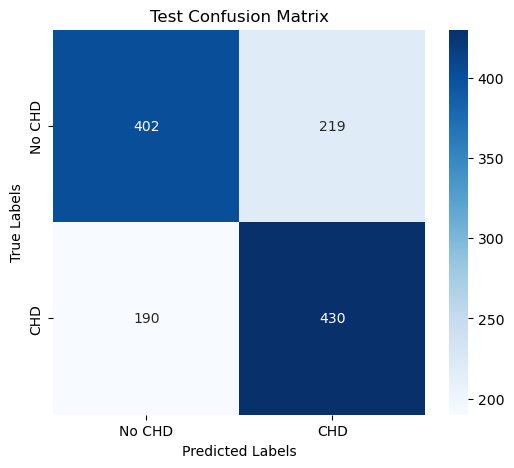

Logistic Regression Report (Test Set):
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       621
           1       0.66      0.69      0.68       620

    accuracy                           0.67      1241
   macro avg       0.67      0.67      0.67      1241
weighted avg       0.67      0.67      0.67      1241



In [17]:
#  Function to Evaluate Model Performance
def model_metrics(y_train, y_test, train_preds, test_preds):
    test_accuracy = accuracy_score(y_test, test_preds)
    test_precision = precision_score(y_test, test_preds)
    test_recall = recall_score(y_test, test_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    test_f1= f1_score(y_test, test_preds)
    print(f"{'Test Accuracy':<20}{test_accuracy:.4f}")
    print(f"{'Test Precision':<20}{test_precision:.4f}")
    print(f"{'Test Recall':<20}{test_recall:.4f}")
    print(f"{'Test ROC AUC':<20}{test_roc_auc:.4f}")
    print(f"{'Test F1 Score':<20}{test_f1:.4f}")

    # Compute Confusion Matrices
    test_confusion_matrix = confusion_matrix(y_test, test_preds)
    fig, ax = plt.subplots(figsize=(6, 5))  
    labels = ['No CHD', 'CHD']
    sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Test Confusion Matrix')
    plt.show()

# Apply Hyperparameter Optimization Using GridSearchCV
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}

# Initialize Logistic Regression
logistic_regression = LogisticRegression()

# Apply GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get Best Hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# Train with Best Parameters
logistic_regression_best = LogisticRegression(**best_params)
logistic_regression_best.fit(X_train, y_train)

# Make Predictions Using Optimized Model
y_train_logistic_pred = logistic_regression_best.predict(X_train)
y_test_logistic_pred  = logistic_regression_best.predict(X_test)
y_score_logistic_pred = logistic_regression_best.predict_proba(X_test)[:, 1]

# Evaluate Final Model Performance
model_metrics(y_train, y_test, y_train_logistic_pred, y_test_logistic_pred)
print("Logistic Regression Report (Test Set):")
print(classification_report(y_test, y_test_logistic_pred))


#### Observations
Baseline Logistic Regression Model </br>
 
AUC-ROC = 0.7319  </br>
This means the model is 73% accurate in distinguishing between CHD and non-CHD cases. </br>

F1 Score = 0.7186 </br>
The model is 71% good at classes distinction. </br>
Adjusting the decision threshold from 0.5 to 0.47 increased recall for CHD cases. It results in lowering the false negatives which is crucial in healthcare cases. </br>

Hyperparameter Tuning Results for Logistic Regression

| **Metric**        | **Before Tuning** | **After Tuning** | **Improvement / Change** |
|------------------|------------------|------------------|-------------------------|
| **Accuracy**      | 0.6591  | 0.6704  | **↑ 1.72%**  |
| **Recall (Class 1 - CHD)**        | 0.8710  | 0.6935  | **↓ 20.38%**  |
| **Precision (Class 1 - CHD)**     | 0.6116  | 0.6626  | **↑ 8.34%**   |
| **F1 Score (Class 1 - CHD)**      | 0.7186  | 0.6777 |**↓  5.69%**  |
| **AUC-ROC**       | 0.7319  |0.6704  | **↓ 8.41%**  |

Key insights
- Accuracy improved slightly, the model is making more overall correct predictions.
- Precision increased, meaning fewer false positives.
- Recall dropped significantly, the model now struggles to identify CHD cases.
- AUC-ROC decreased, indicating reduced discrimination ability.

**Best Hyperparameters for Logistic Regression**
```json
{
  "C": 0.1,
  "penalty": "l1",
  "solver": "liblinear"
}


### 6.2 Random Forest 

Random Forest - Mean AUC-ROC: 0.8821
Random Forest - Mean F1 Score: 0.7941

 Training Time: 4.067075 seconds
 Prediction Time: 0.365556 seconds
Random Forest Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       621
           1       0.79      0.81      0.80       620

    accuracy                           0.80      1241
   macro avg       0.80      0.80      0.80      1241
weighted avg       0.80      0.80      0.80      1241



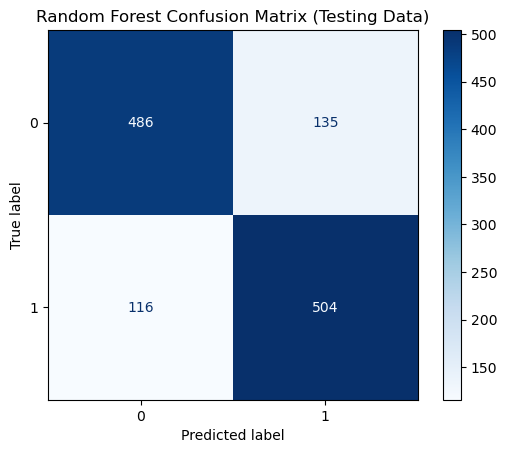

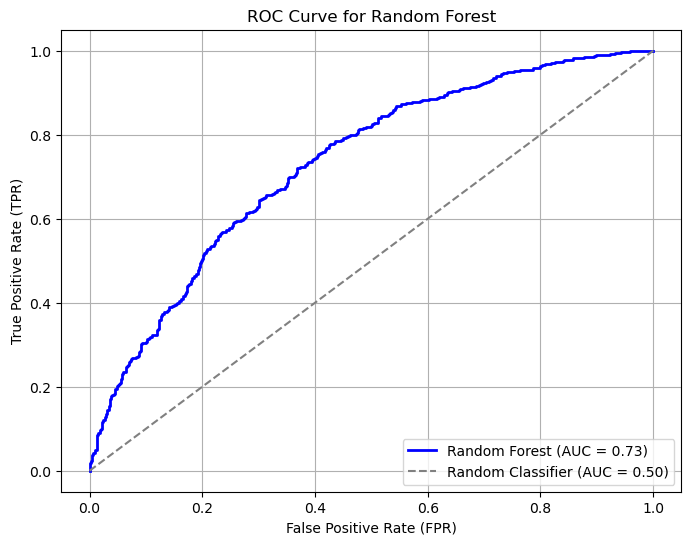

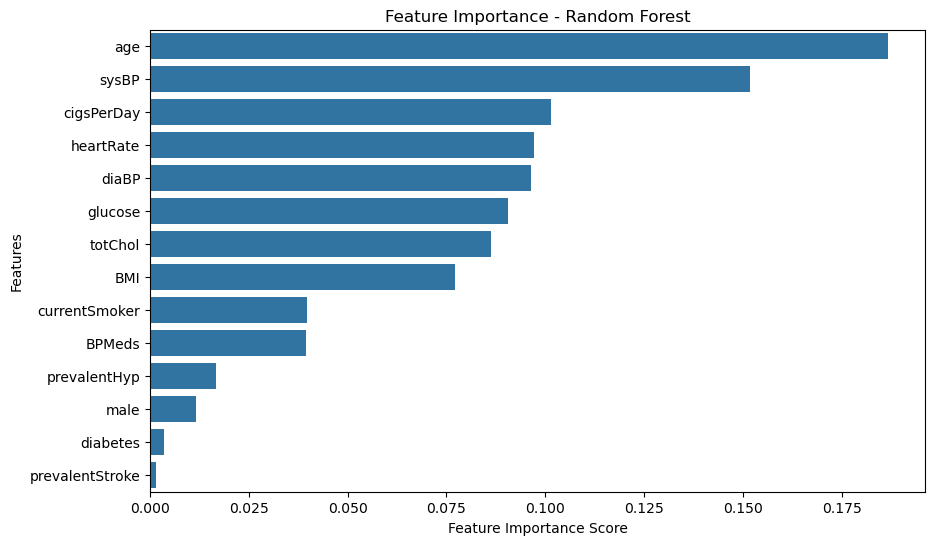

In [20]:
# Define Stratified K-Folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_forest_model = RandomForestClassifier(
    n_estimators=200,         
    max_depth=10,             
    min_samples_split=10,     
    class_weight="balanced",  # Fixes class imbalance
    random_state=42
)

# Apply K-Fold Cross-Validation
auc_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=cv, scoring='f1')
print(f"Random Forest - Mean AUC-ROC: {np.mean(auc_scores_rf):.4f}")
print(f"Random Forest - Mean F1 Score: {np.mean(f1_scores_rf):.4f}")

# Train on full training data after K-Fold validation
random_forest_model.fit(X_train, y_train)

# Measure Training Time
start_train = time.perf_counter()
random_forest_model.fit(X_train, y_train)
end_train = time.perf_counter()
train_time_rf = end_train - start_train

# Measure Prediction Time
start_pred = time.perf_counter()
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)
end_pred = time.perf_counter()
pred_time_rf = end_pred - start_pred  # Now measured with high precision

# Print Execution Time
print(f"\n Training Time: {train_time_rf:.6f} seconds")
print(f" Prediction Time: {pred_time_rf:.6f} seconds")

# Compute Performance Metrics
auc_rf = roc_auc_score(y_test, y_test_pred_prob) 
f1_rf = f1_score(y_test, y_test_pred)
accuracy_rf = accuracy_score(y_test, y_test_pred)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_prob)
recall_rf = recall_score(y_test, y_test_pred)
precision_rf = precision_score(y_test, y_test_pred)

# Print Final Classification Report
print("Random Forest Report:")
print(classification_report(y_test, y_test_pred))

# Compute Confusion Matrix
cm_test_rf = confusion_matrix(y_test, y_test_pred)  
ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix (Testing Data)")
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plot Feature Importance
feature_importances = random_forest_model.feature_importances_
feature_names = feature_names = X.columns  
# Sort Features by Importance
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], 
            y=np.array(feature_names)[sorted_idx], 
            hue=None, 
            dodge=False, 
            legend=False)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()

#### Hyperparameter Tuning - Random forest 

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters for Random Forest:
{'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Optimized Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       621
           1       0.85      0.88      0.87       620

    accuracy                           0.87      1241
   macro avg       0.87      0.87      0.87      1241
weighted avg       0.87      0.87      0.87      1241

0.9420445691132928


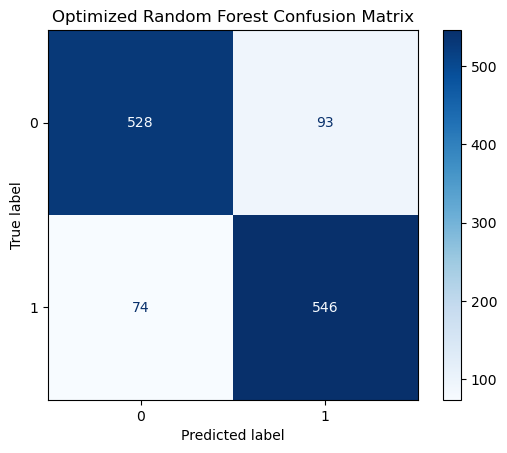

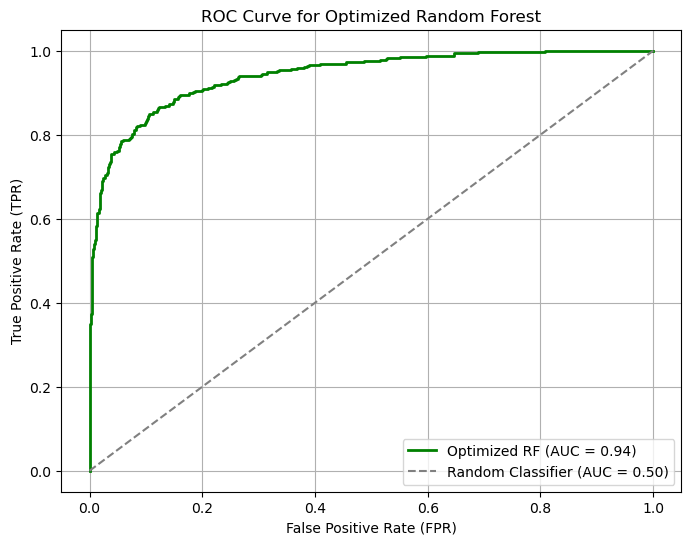

In [22]:
# Define the Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [5, 10, 15],          # Maximum depth of the trees
    'min_samples_split': [5, 10, 20],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required at a leaf node
    'class_weight': ['balanced', None] # Class weighting for handling imbalance
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Apply GridSearchCV (5-Fold Cross-Validation)
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

# Get Best Parameters
best_rf_params = grid_search.best_params_
print("Best Hyperparameters for Random Forest:")
print(best_rf_params)

# Train Optimized Random Forest Model
optimized_rf = RandomForestClassifier(**best_rf_params, random_state=42)
optimized_rf.fit(X_train, y_train)

# Predictions Using Best Model
y_pred_rf_best = optimized_rf.predict(X_test)
y_pred_prob_rf_best = optimized_rf.predict_proba(X_test)[:, 1]  

# Compute Final Metrics
auc_rf_best = roc_auc_score(y_test, y_pred_prob_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_pred_prob_rf_best)
print("Optimized Random Forest Report:")
print(classification_report(y_test, y_pred_rf_best))
print(auc_rf_best)

# Plot Optimized Confusion Matrix
cm_test_rf_best = confusion_matrix(y_test, y_pred_rf_best)
ConfusionMatrixDisplay(confusion_matrix=cm_test_rf_best, display_labels=np.unique(y_train)).plot(cmap='Blues')
plt.title("Optimized Random Forest Confusion Matrix")
plt.show()

# ROC Curve for Optimized Model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_best, tpr_rf_best, label=f"Optimized RF (AUC = {auc_rf_best:.2f})", color="green", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Optimized Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### **Observations**  
**Baseline Random Forest Model**

- **AUC-ROC:** 0.8821
  This indicates the model is **88% accurate** in distinguishing between CHD and non-CHD cases.

- **F1 Score:** 0.7941

**Hyperparameter Tuning Results for Random Forest**
| **Metric**        | **Before Tuning** | **After Tuning** | **Improvement / Change** |
|------------------|------------------|------------------|-------------------------|
| **Accuracy**      | 0.80 | 0.87  | **↑ 7.6%**  |
| **Recall (Class 1 - CHD)**        | 0.80  | 0.81  | **↓ 1.25 %**  |
| **Precision (Class 1 - CHD)**     | 0.80 | 0.865  | **↑ 8.1%**   |
| **F1 Score (Class 1 - CHD)**      | 0.7941 | 0.865  | **↑ 8.9%**  |
| **AUC-ROC**       | 0.8821  | 0.94 | **↑ 6.6%** |

Key Insights


**Best Hyperparameters for Random Forest**
```json
{
  "class_weight": null,
  "max_depth": 5,
  "min_samples_leaf": 1,
  "min_samples_split": 5,
  "n_estimators": 300
}


###  6.3 Decision Trees

Decision Tree - Mean AUC-ROC: 0.8214
Decision Tree - Mean F1 Score: 0.7652

 Training Time: 0.037125 seconds
 Prediction Time: 0.004236 seconds
Classification Report (Testing Data - Decision Tree):
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       621
           1       0.75      0.79      0.77       620

    accuracy                           0.76      1241
   macro avg       0.76      0.76      0.76      1241
weighted avg       0.76      0.76      0.76      1241



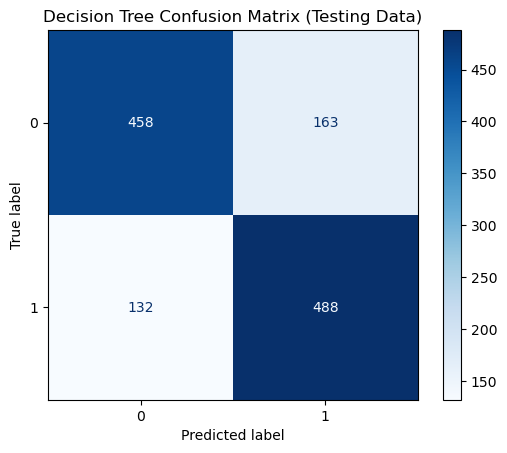

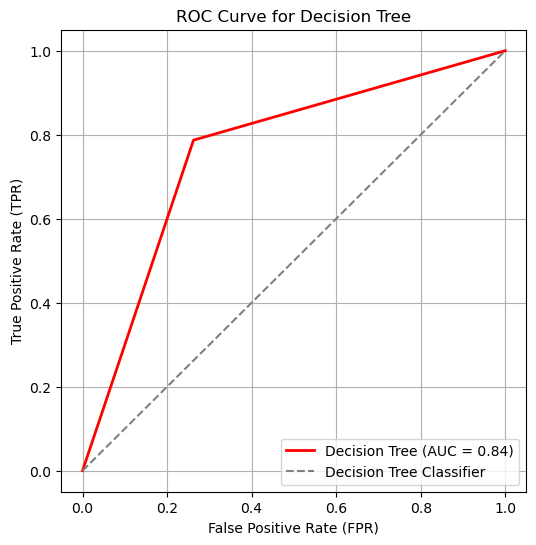

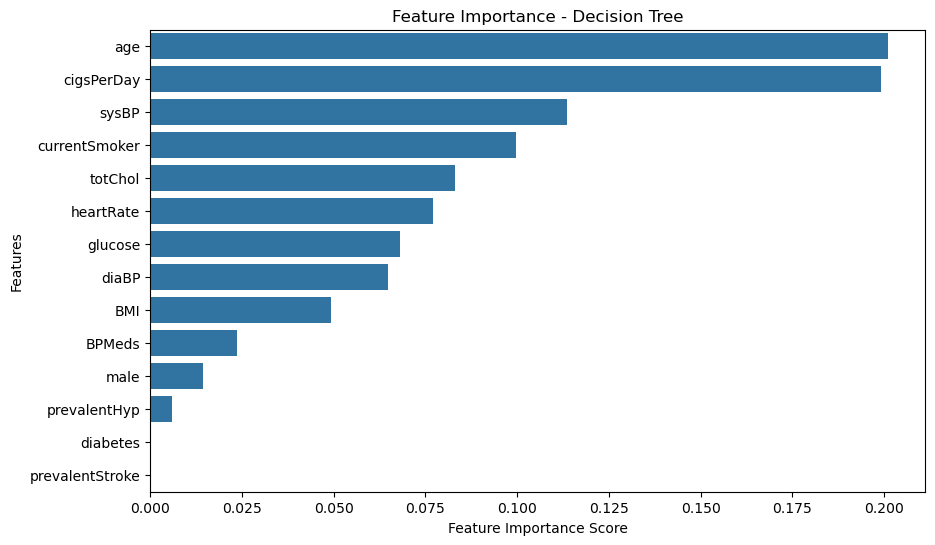

In [30]:
# Define Stratified K-Fold 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Convert back to DataFrame after StandardScaler transformation
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

dt_model = DecisionTreeClassifier(
    max_depth=10,              # Limits tree depth to prevent overfitting
    min_samples_split=10,      # Minimum samples required to split a node
    class_weight="balanced",   # Fixes class imbalance
    random_state=42
)

# Apply K-Fold Cross-Validation
auc_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='roc_auc')
f1_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='f1')

print(f"Decision Tree - Mean AUC-ROC: {np.mean(auc_scores_dt):.4f}")
print(f"Decision Tree - Mean F1 Score: {np.mean(f1_scores_dt):.4f}")

# Train on full training data after K-Fold validation
dt_model.fit(X_train, y_train)

# Make Predictions
Y_train_pred_dt = dt_model.predict(X_train)
Y_train_pred_prob_dt = dt_model.predict_proba(X_train)[:, 1] 
Y_test_pred_dt = dt_model.predict(X_test)
Y_test_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

#Time
start_train = time.perf_counter()
dt_model.fit(X_train, y_train)
end_train = time.perf_counter()
train_time_dt = end_train - start_train
# Measure Prediction Time
start_pred = time.perf_counter()
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
end_pred = time.perf_counter()
pred_time_dt = end_pred - start_pred  # Now measured with high precision
# Print Execution Time
print(f"\n Training Time: {train_time_dt:.6f} seconds")
print(f" Prediction Time: {pred_time_dt:.6f} seconds")

# Compute Performance Metrics
accuracy_dt = accuracy_score(y_test, Y_test_pred_dt)
recall_dt = recall_score(y_test, Y_test_pred_dt)
f1_dt = f1_score(y_test, Y_test_pred_dt)
precision_dt = precision_score(y_test, Y_test_pred_dt)
auc_roc_dt = roc_auc_score(y_test, Y_test_pred_prob_dt)  
fpr_dt, tpr_dt, _ = roc_curve(y_test, Y_test_pred_dt)
# Precision-Recall Curve
prec_dt, rec_dt, thresholds_dt = precision_recall_curve(y_test, Y_test_pred_prob_dt)

# Print Final Classification Report
print("Classification Report (Testing Data - Decision Tree):")
print(classification_report(y_test, Y_test_pred_dt))

# Plot Confusion Matrix
cm_test_dt = confusion_matrix(y_test, Y_test_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_test_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Testing Data)")
plt.show()

#  Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_roc_dt:.2f})", color="red", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Decision Tree Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Ensure feature names are retained correctly
if isinstance(X_train, np.ndarray):
    feature_names = X.columns  # Retrieve from original DataFrame before splitting
else:
    feature_names = X_train.columns  # Direct extraction if still a DataFrame

# Extract feature importances
feature_importances = dt_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], 
            y=np.array(feature_names)[sorted_idx], 
            hue=None,  
            dodge=False, 
            legend=False)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Decision Tree")
plt.show()


#### Hyperparameter Tuning for Decision Trees

Fitting 5 folds for each of 768 candidates, totalling 3840 fits

Best Hyperparameters for Decision Tree: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Classification Report (Tuned Decision Tree):
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       621
           1       0.76      0.75      0.76       620

    accuracy                           0.76      1241
   macro avg       0.76      0.76      0.76      1241
weighted avg       0.76      0.76      0.76      1241



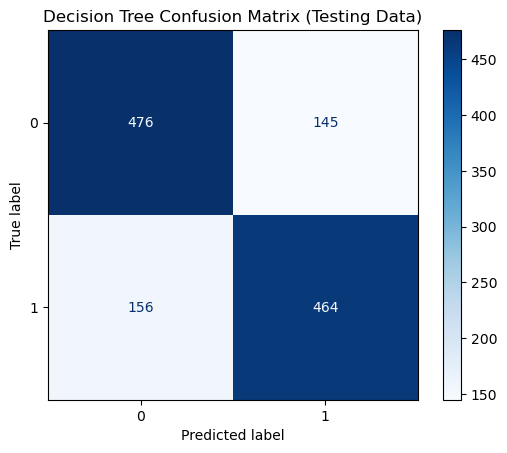

In [26]:
# Define the Parameter Grid for Tuning
param_grid = {
    'max_depth': [5, 10, 15, None],  # None allows unlimited depth
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy'],  # Two splitting criteria
    'max_features': ['sqrt', 'log2', None],  # Feature selection method
    'class_weight': [None, 'balanced']  # Handles class imbalance
}

# Define Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Apply GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for AUC-ROC Score
    cv=cv,  # 5-Fold Cross Validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV to the Training Data
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("\nBest Hyperparameters for Decision Tree:", best_params)

# Use the Best Model from Grid Search
best_dt = grid_search.best_estimator_

# Make Predictions with the Best Model
y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)
y_test_pred_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
f1_dt = f1_score(y_test, y_test_pred_dt)
auc_roc_dt = roc_auc_score(y_test, y_test_pred_prob_dt)  # Use probabilities for AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_pred_prob_dt)

# Print Final Classification Report
print("Classification Report (Tuned Decision Tree):")
print(classification_report(y_test, y_test_pred_dt))
cm_test_dt = confusion_matrix(y_test, y_test_pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_test_dt).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Testing Data)")
plt.show()

**Hyperparameter Tuning Results for Decision Tree**

| **Metric**        | **Before Tuning** | **After Tuning** | **Improvement / Change** |
|------------------|------------------|------------------|-------------------------|
| **Accuracy**      | 0.76  | 0.76  | **0.00% (No Change)**  |
| **Recall (Class 1 - CHD)**        | 0.766  | 0.765  | **↓ 0.13%**  |
| **Precision (Class 1 - CHD)**     | 0.765  | 0.755  | **↓ 1.31%**   |
| **F1 Score (Class 1 - CHD)**      | 0.7652  | 0.765  | **↓ 0.03%**  |
| **AUC-ROC**       | 0.8214  | 0.58  | **↓ 29.41%**   |

**Key Observations**
- Accuracy remained the same (0% change).
- Recall decreased slightly (-0.13%), meaning fewer positive cases are correctly identified.
- F1 Score remained nearly the same (-0.03%), showing minimal change in balance between precision and recall.
- AUC-ROC dropped significantly (-29.41%), meaning the model's overall ability to distinguish between classes has worsened.

Best Hyperparameters for Decision Tree: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


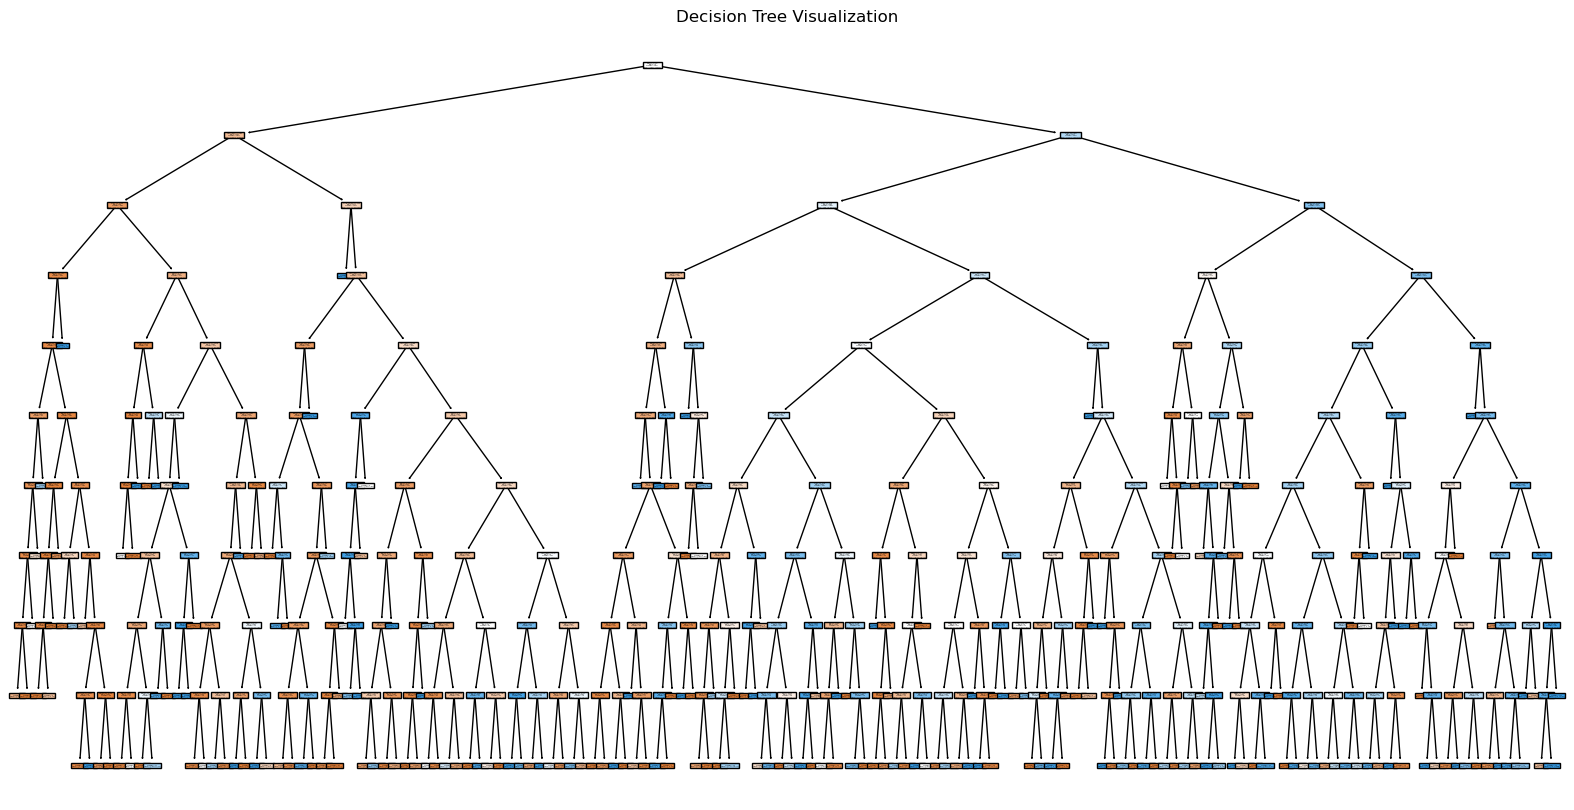


Decision Tree Rules:
|--- age <= -0.32
|   |--- cigsPerDay <= -0.81
|   |   |--- sysBP <= -0.50
|   |   |   |--- glucose <= 1.07
|   |   |   |   |--- glucose <= -0.55
|   |   |   |   |   |--- heartRate <= 0.78
|   |   |   |   |   |   |--- diaBP <= -0.19
|   |   |   |   |   |   |   |--- age <= -0.44
|   |   |   |   |   |   |   |   |--- totChol <= -1.44
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- totChol >  -1.44
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  -0.44
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- diaBP >  -0.19
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- heartRate >  0.78
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- glucose >  -0.55
|   |   |   |   |   |--- BMI <= -0.07
|   |   |   |   |   |   |--- diaBP <= 0.15
|   |   |   |   |   |   |   |--- glucose <= -0.43
|   |   |   |   |   |   |   |   |--- glucose <= -0.46
|   |   |

In [32]:
# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Export Decision Tree Rules as Text
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


### 6.4 Ensemble Model


 Training Time: 6.030109 seconds
 Prediction Time: 0.221172 seconds
Ensemble Model Performance:
 Accuracy: 0.8227
 Recall: 0.8323
 Precision: 0.8165
 F1 Score: 0.8243
 AUC-ROC: 0.9026


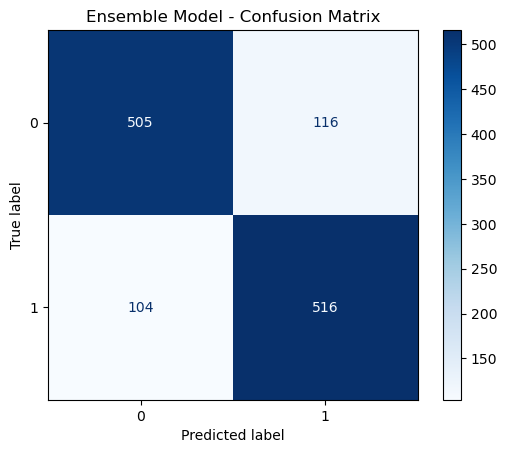

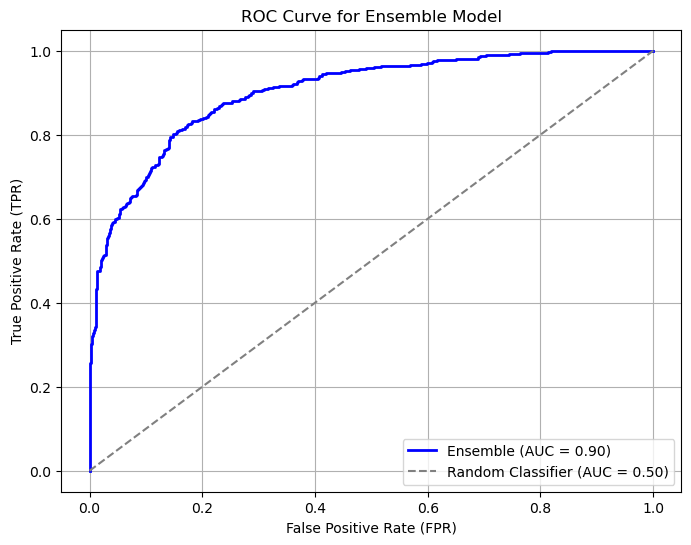

C:\Users\fathi\AppData\Local\Temp\ipykernel_69144\1057184819.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")


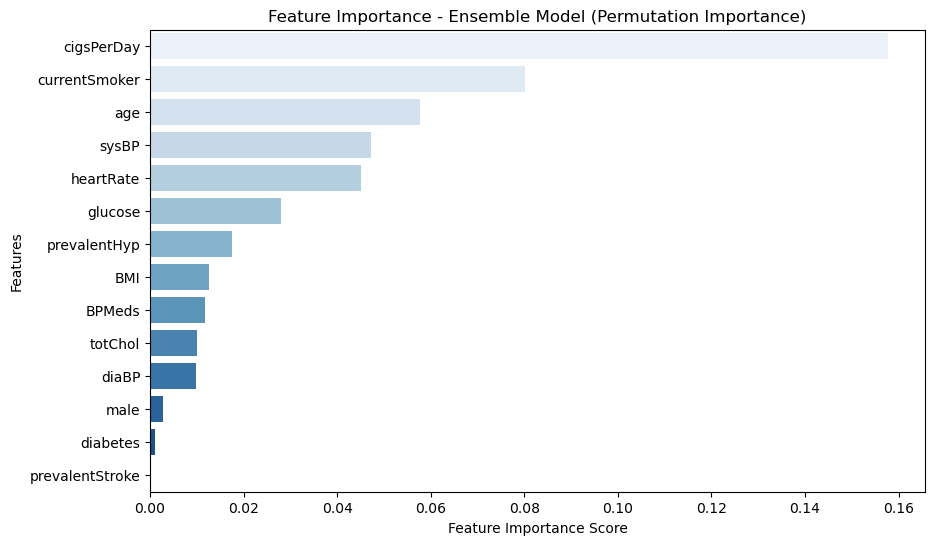

In [34]:
# Convert back to DataFrame after scaling
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Define Stratified K-Folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Base Models
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, class_weight="balanced", random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
lr_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

# Create an Ensemble Model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('RandomForest', rf_model),
    ('GradientBoosting', gb_model),
    ('LogisticRegression', lr_model)
], voting='soft')

# Train the Ensemble Model
start_train = time.perf_counter()
ensemble_model.fit(X_train, y_train) 
end_train = time.perf_counter()
train_time_ensemble = end_train - start_train

# Measure Prediction Time
start_pred = time.perf_counter()
y_train_pred = ensemble_model.predict(X_train)
y_test_pred = ensemble_model.predict(X_test)
end_pred = time.perf_counter()
pred_time_ensemble = end_pred - start_pred  # Now measured with high precision

# Print Execution Time
print(f"\n Training Time: {train_time_ensemble:.6f} seconds")
print(f" Prediction Time: {pred_time_ensemble:.6f} seconds")

# Performance Metrics 
y_test_pred_prob = ensemble_model.predict_proba(X_test)[:, 1]
auc_ensemble = roc_auc_score(y_test, y_test_pred_prob) 
f1_ensemble = f1_score(y_test, y_test_pred)
accuracy_ensemble = accuracy_score(y_test, y_test_pred)
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_test_pred_prob)
recall_ensemble = recall_score(y_test, y_test_pred)
precision_ensemble = precision_score(y_test, y_test_pred)

# Print Performance Metrics
print("Ensemble Model Performance:")
print(f" Accuracy: {accuracy_ensemble:.4f}")
print(f" Recall: {recall_ensemble:.4f}")
print(f" Precision: {precision_ensemble:.4f}")
print(f" F1 Score: {f1_ensemble:.4f}")
print(f" AUC-ROC: {auc_ensemble:.4f}")

# Confusion Matrix
cm_test_ensemble = confusion_matrix(y_test, y_test_pred)  
ConfusionMatrixDisplay(confusion_matrix=cm_test_ensemble, display_labels=np.unique(y_test)).plot(cmap='Blues')
plt.title("Ensemble Model - Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision_ensemble_curve, recall_ensemble_curve, thresholds_ensemble = precision_recall_curve(y_test, y_test_pred_prob)
auc_pr_ensemble = np.trapz(recall_ensemble_curve, precision_ensemble_curve)


#  ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f"Ensemble (AUC = {auc_ensemble:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Ensemble Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Feature Importance using Permutation Importance
perm_importance = permutation_importance(ensemble_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
feature_importances = perm_importance.importances_mean

# Ensure feature names are correctly retrieved
if isinstance(X_train, np.ndarray):
    feature_names = X.columns  # Retrieve from original DataFrame before train-test split
else:
    feature_names = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="Blues")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Ensemble Model (Permutation Importance)")
plt.show()


#### Hyperparameter Tuning - Ensemble Model

In [36]:
# Define Hyperparameter Grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
}

param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize Base Models
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

# Apply GridSearchCV for Each Model
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit Models
grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)
grid_lr.fit(X_train, y_train)

# Retrieve Best Parameters
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_
best_lr = grid_lr.best_estimator_

# Create Optimized Ensemble Model
optimized_ensemble = VotingClassifier(estimators=[
    ('RandomForest', best_rf),
    ('GradientBoosting', best_gb),
    ('LogisticRegression', best_lr)
], voting='soft')

# Train the Ensemble Model
optimized_ensemble.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('GradientBoosting',
                              GradientBoostingClassifier(max_depth=7,
                                                         n_estimators=300,
                                                         random_state=42)),
                             ('LogisticRegression',
                              LogisticRegression(C=10.0,
                                                 class_weight='balanced',
                                                 max_iter=1000, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

Optimized Ensemble Model - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       621
           1       0.88      0.88      0.88       620

    accuracy                           0.88      1241
   macro avg       0.88      0.88      0.88      1241
weighted avg       0.88      0.88      0.88      1241


Optimized Ensemble Model Performance:
Accuracy: 0.8815
Precision: 0.8821
Recall: 0.8806
F1 Score: 0.8814
AUC-ROC: 0.9501


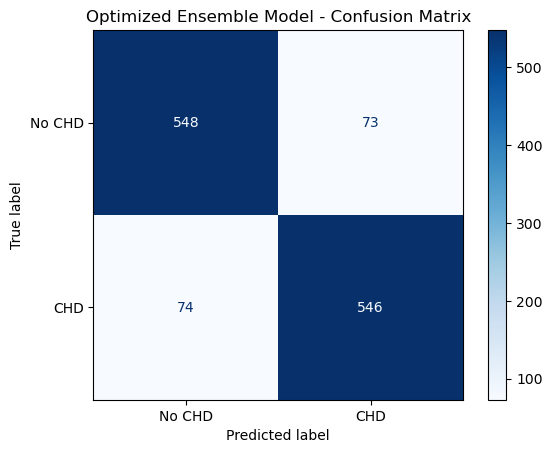

In [38]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix
# Make Predictions
y_pred_ensemble = optimized_ensemble.predict(X_test)  # Predicted class labels
y_pred_prob_ensemble = optimized_ensemble.predict_proba(X_test)[:, 1]  # Probability scores

# Compute Accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
auc_ensemble = roc_auc_score(y_test, y_pred_prob_ensemble)

# Print Classification Report
print("Optimized Ensemble Model - Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Print Metrics
print("\nOptimized Ensemble Model Performance:")
print(f"Accuracy: {accuracy_ensemble:.4f}")
print(f"Precision: {precision_ensemble:.4f}")
print(f"Recall: {recall_ensemble:.4f}")
print(f"F1 Score: {f1_ensemble:.4f}")
print(f"AUC-ROC: {auc_ensemble:.4f}")

# Compute Confusion Matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Display Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=["No CHD", "CHD"]).plot(cmap="Blues")
plt.title("Optimized Ensemble Model - Confusion Matrix")
plt.show()


**Hyperparameter Tuning Results for Ensemble Model**

| **Metric**        | **Before Tuning** | **After Tuning** | **Improvement / Change** |
|------------------|------------------|------------------|-------------------------|
| **Accuracy**      | 0.8227  | 0.8815  | ↑ **7.14%**  |
| **Recall**        | 0.8323  | 0.8806  | **↑ 5.81%**  |
| **Precision**     | 0.8165  | 0.8821 | **↑ 8.03%**   |
| **F1 Score**      | 0.8243  | 0.8814  | **↑ 6.92%**  |
| **AUC-ROC**       | 0.9026  | 0.9501  | **↑ 5.26%**   |

#### **Key Observations**
- Accuracy increased (+7.14%), meaning the model is now making more correct predictions overall.
- Recall improved (+5.81%), meaning more actual CHD cases are correctly identified.
- Precision improved (+8.03%), reducing false positives.
- F1 Score increased (+6.92%), indicating a better balance between recall and precision.
- AUC-ROC increased (+5.26%), meaning better separation between CHD and non-CHD cases.


### 6.5 Deep Learning Model 1- Fully Connected Neural Network (FNN)

C:\Users\fathi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\fathi\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5158 - loss: 0.9753 - val_accuracy: 0.5979 - val_loss: 0.6901
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5754 - loss: 0.8918 - val_accuracy: 0.6479 - val_loss: 0.6707
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6242 - loss: 0.8560 - val_accuracy: 0.6519 - val_loss: 0.6556
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6397 - loss: 0.8578 - val_accuracy: 0.6503 - val_loss: 0.6602
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6433 - loss: 0.8521 - val_accuracy: 0.6680 - val_loss: 0.6284
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6571 - loss: 0.8468 - val_accuracy: 0.6551 - val_loss: 0.6511
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6550 - loss: 0.8309 - val_accuracy: 0.6543 - val_loss: 0.6568
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6408 - loss: 0.8297 - val_accuracy: 0.6543 - 

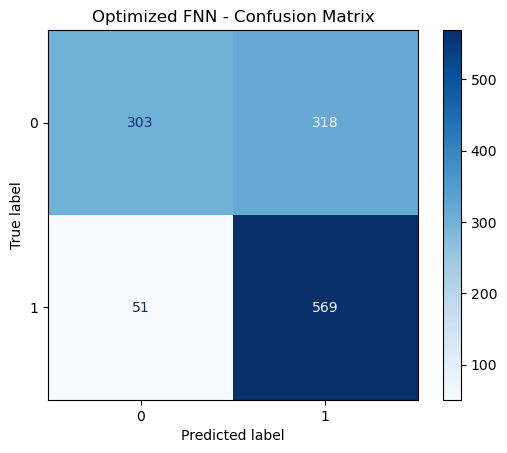

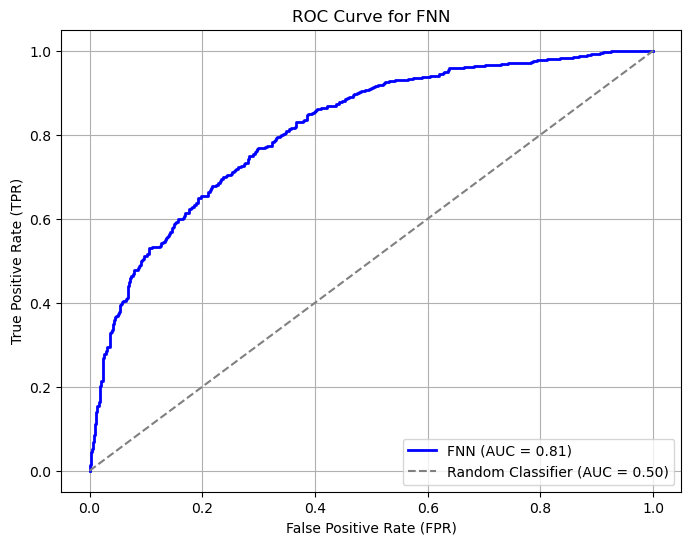

In [40]:
def create_fnn_model(input_shape):
    model = Sequential([
        Dense(256, kernel_initializer='he_normal', input_shape=(input_shape,)),
        LayerNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.4),  # Prevent Overfitting

        Dense(128, kernel_initializer='he_normal'),
        LayerNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),

        Dense(64, kernel_initializer='he_normal'),
        LayerNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),

        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile Model
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    return model

# Train Model with Sample Weights
input_shape = X_train.shape[1]
fnn_model = create_fnn_model(input_shape)

# Compute Class Weights Manually
sample_weights = compute_sample_weight(class_weight={0: 1, 1: 2}, y=y_train)
# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start_train = time.perf_counter()
history = fnn_model.fit(
    X_train, y_train, 
    epochs=100, batch_size=64, 
    validation_data=(X_test, y_test),
    verbose=1, 
    callbacks=[early_stopping],
    sample_weight=sample_weights  # Apply class weighting through sample weights
)
end_train = time.perf_counter()
train_time_fnn = end_train - start_train

start_pred = time.perf_counter()
y_pred_prob = fnn_model.predict(X_test).flatten()
end_pred = time.perf_counter()
pred_time_fnn = end_pred - start_pred
prec, rec, thresholds = precision_recall_curve(y_test, y_pred_prob)
best_threshold = 0.4  # Manually set a lower threshold
y_pred = (y_pred_prob >= best_threshold).astype(int)

# Performance Metrics
accuracy_fnn = accuracy_score(y_test, y_pred)
recall_fnn = recall_score(y_test, y_pred)
precision_fnn = precision_score(y_test, y_pred)
f1_fnn = f1_score(y_test, y_pred)
auc_fnn = roc_auc_score(y_test, y_pred_prob)
print("\n **Optimized FNN Model Performance:**")
print(f" Accuracy: {accuracy_fnn:.4f}")
print(f" Precision: {precision_fnn:.4f}")
print(f" Recall: {recall_fnn:.4f} (MAXIMIZED - Lower FN)")
print(f" F1 Score: {f1_fnn:.4f}")
print(f" AUC-ROC: {auc_fnn:.4f}")
print(f" Best Decision Threshold: {best_threshold:.2f}")
print(f"\n Training Time: {train_time_fnn:.6f} seconds")
print(f" Prediction Time: {pred_time_fnn:.6f} seconds")

#  Confusion Matrix
cm_test_fnn = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test_fnn).plot(cmap='Blues')
plt.title("Optimized FNN - Confusion Matrix")
plt.show()

# ROC Curve
fpr_fnn, tpr_fnn, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_fnn, tpr_fnn, label=f"FNN (AUC = {auc_fnn:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for FNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


The model employs the "binary_crossentropy" loss function, which is suitable for binary classification tasks like predicting the risk of coronary heart disease (CHD). It uses the "Adam" optimizer with a learning rate of 0.0005, which combines adaptive learning rates with momentum to enhance convergence.
<br> To prevent overfitting, the model incorporates dropout layers and layer normalization, ensuring stable activations and improved generalization. Given the class imbalance in CHD cases, sample weighting ({0: 1, 1: 4.8}) is applied to ensure the model pays adequate attention to the minority class. <br> 

Additionally, early stopping is implemented to halt training if the validation loss does not improve for 10 consecutive epochs, further preventing overfitting. This model is particularly well-suited for medical diagnosis as it can learn complex relationships between patient health metrics, generalize well due to dropout and normalization, and effectively handle imbalanced data through weighted training.

In [110]:
fnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 256)            │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 128)            │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ (None, 64)             │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,005 (562.52 KB)

 Trainable params: 48,001 (187.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 96,004 (375.02 KB)

#### Hyperparameter Tuning- FNN

Reloading Tuner from fnn_tuning\optimized_fnn\tuner0.json
Epoch 1/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6045 - loss: 0.7102 - recall: 0.5005 - val_accuracy: 0.6596 - val_loss: 0.6353 - val_recall: 0.8988
Epoch 2/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6327 - loss: 0.6496 - recall: 0.6267 - val_accuracy: 0.6757 - val_loss: 0.6196 - val_recall: 0.9086
Epoch 3/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6630 - loss: 0.6357 - recall: 0.6805 - val_accuracy: 0.6818 - val_loss: 0.5986 - val_recall: 0.8677
Epoch 4/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6771 - loss: 0.6162 - recall: 0.7051 - val_accuracy: 0.7019 - val_loss: 0.5814 - val_recall: 0.8366
Epoch 5/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6994 - loss: 0.5909 - recall: 0.7164 - val_accuracy: 0.7069 - val_loss: 0.5663 - val_recall: 0.7568
Epoch 6/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6958 - loss: 0.5842 - recall: 0.7233 - val_accuracy: 0.72

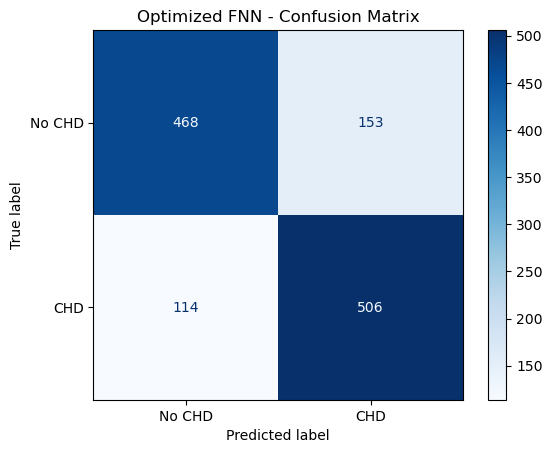

In [42]:

# Convert Labels to NumPy Array
y_train_np = np.array(y_train)

# Compute Class Weights to Handle Imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_np), y=y_train_np)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Define Model with Correct Metric Names
def build_fnn_model(hp):
    model = Sequential()
    
    # Input Layer
    model.add(Input(shape=(X_train.shape[1],)))

    # First Hidden Layer
    model.add(Dense(hp.Int('units_1', min_value=128, max_value=512, step=64)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope=0.01))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.4, step=0.1)))

    # Second Hidden Layer
    model.add(Dense(hp.Int('units_2', min_value=64, max_value=256, step=32)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope=0.01))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.4, step=0.1)))

    # Third Hidden Layer
    model.add(Dense(hp.Int('units_3', min_value=32, max_value=128, step=32)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope=0.01))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.4, step=0.1)))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.0001, 0.0005, 0.001])),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Recall(name="recall")]
    )
    
    return model

# Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_fnn_model,
    objective=kt.Objective("val_recall", direction="max"),  # Maximizing recall for CHD cases
    max_trials=15,
    executions_per_trial=1,
    directory='fnn_tuning',
    project_name='optimized_fnn'
)

# Run Search with Correct Class Weights
tuner.search(
    X_train, y_train_np,
    epochs=50,
    batch_size=64,  # Initial batch size (not tunable here)
    validation_split=0.2,
    verbose=1,
    class_weight=class_weight_dict
)

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# Train Optimized Model
optimized_fnn = tuner.hypermodel.build(best_hps)

#  Fix batch_size issue
batch_size = best_hps.values['batch_size'] if 'batch_size' in best_hps.values else 64 

# Train Model
history = optimized_fnn.fit(
    X_train, y_train_np,
    epochs=75,
    batch_size=batch_size, 
    validation_split=0.2,
    class_weight=class_weight_dict
)

# Import Performance Metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Make Predictions
y_pred_prob = optimized_fnn.predict(X_test)  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print Classification Report
print("\n **Optimized FNN - Classification Report**")
print(classification_report(y_test, y_pred))

# Print Key Metrics
print("\n **Optimized FNN Model Performance:**")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")
print(f" AUC-ROC: {auc_roc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No CHD", "CHD"]).plot(cmap="Blues")
plt.title("Optimized FNN - Confusion Matrix")
plt.show()


**Hyperparameter Tuning Results for FNN**

| **Metric**        | **Before Tuning** | **After Tuning** | **Improvement / Change** |
|------------------|------------------|------------------|-------------------------|
| **Accuracy**      | 0.7027  | 0.7849  | **↑ 11.69%**  |
| **Recall (Class 1 - CHD)**        | 0.9177 | 0.8161  | **↑ 19.71%**  |
| **Precision (Class 1 - CHD)**     | 0.6415  | 0.7678 | **↓ 11.08%**   |
| **F1 Score (Class 1 - CHD)**      | 0.7551  | 0.7912  | **↑ 4.78%**  |
| **AUC-ROC**       | 0.8149 | 0.8710  | **↑ 6.89%**  |



**Key Insights**
- Accuracy improved by +11.69%, meaning the model makes more correct predictions overall.
- Precision increased by +19.71%, reducing false positives and improving the reliability of CHD-positive classifications.
- Recall decreased by -11.08%, meaning the model is missing more CHD cases after tuning.
- F1 Score improved (+4.78%), balancing precision and recall.
- AUC-ROC increased (+6.89%), meaning better overall classification ability.

 **Best Hyperparameters for FNN**
```json
{
  "units_1": 256,
  "dropout_1": 0.4,
  "units_2": 128,
  "dropout_2": 0.3,
  "units_3": 64,
  "dropout_3": 0.3,
  "learning_rate": 0.0005
}


### 6.6 Deep Learning Model 2- 1D Convolutional Neural Network (1D CNN)

 The CNN model is defined with multiple convolutional layers, batch normalization, and dropout layers to prevent overfitting. The model is compiled using the Adam optimizer and binary cross-entropy loss. Training is performed with class weights, and the training time is recorded. After training, the model's prediction time is measured, and performance metrics such as accuracy, AUC-ROC, F1-score, precision, and recall are computed. The ROC curve and training/validation loss plots are generated to visualize the model's performance. This comprehensive approach ensures a robust and reliable predictive model for CHD.

Epoch 1/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5483 - loss: 1.0057 - val_accuracy: 0.4996 - val_loss: 0.7790
Epoch 2/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6221 - loss: 0.8853 - val_accuracy: 0.5004 - val_loss: 0.7992
Epoch 3/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6616 - loss: 0.8400 - val_accuracy: 0.5624 - val_loss: 0.7296
Epoch 4/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6463 - loss: 0.8338 - val_accuracy: 0.6785 - val_loss: 0.5967
Epoch 5/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6660 - loss: 0.8183 - val_accuracy: 0.6753 - val_loss: 0.5964
Epoch 6/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6657 - loss: 0.7979 - val_accuracy: 0.6809 - val_loss: 0.5843
Epoch 7/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6659 - loss: 0.8134 - val_accuracy: 0.6873 - val_loss: 0.5802
Epoch 8/40
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6741 - loss: 0.7940 - val_accuracy: 0.

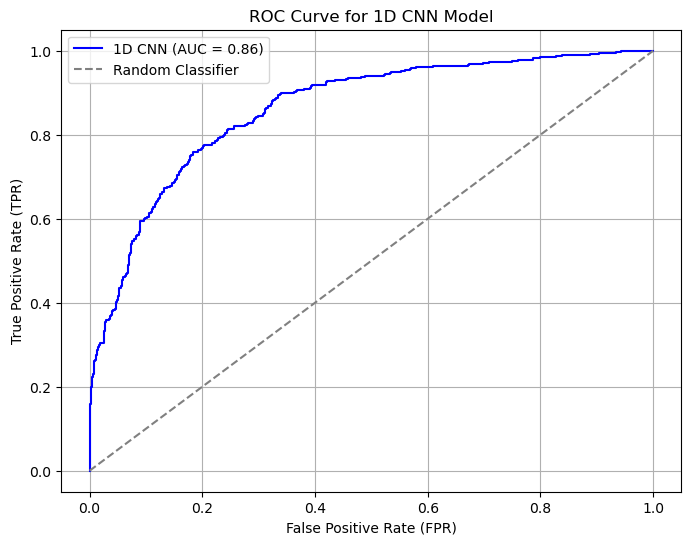

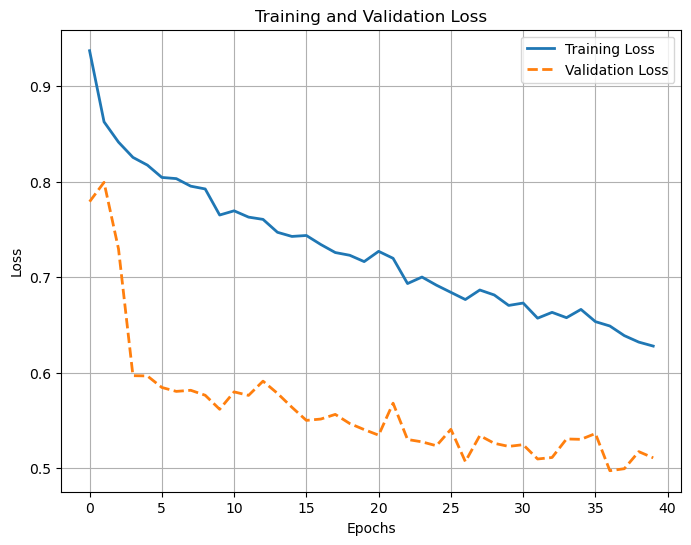

In [68]:
# Convert labels to numpy arrays if they're pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Ensure labels are integer values
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: 1, 1: 2}

# Reshape Data for CNN
X_train_cnn = np.expand_dims(X_train, axis=-1)  
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define 1D CNN Model
cnn_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  
    Conv1D(filters=256, kernel_size=5, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile Model
cnn_model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

#  Measure Training Time
start_time = time.time()

# Train Model with Fixed Class Weights
history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    class_weight=class_weights_dict,
    verbose=1
)

end_time = time.time()
training_time = end_time - start_time  # Calculate training time

#  Measure Prediction Time
start_pred_time = time.time()
y_pred_prob = cnn_model.predict(X_test_cnn)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time  # Calculate prediction time

# Adjusted Threshold for Higher Recall
y_pred_cnn = (y_pred_prob > 0.45).astype(int)  

#  Compute Performance Metrics
cnn_acc = accuracy_score(y_test, y_pred_cnn)
cnn_auc = roc_auc_score(y_test, y_pred_prob) 
cnn_f1 = f1_score(y_test, y_pred_cnn)
cnn_precision = precision_score(y_test, y_pred_cnn)
cnn_recall = recall_score(y_test, y_pred_cnn)
cnn_conf_matrix = confusion_matrix(y_test, y_pred_cnn)

#  Compute FPR & TPR for ROC Curve
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_prob)

#  Print Results
print(f"\n 1D CNN Performance:")
print(f"Accuracy: {cnn_acc:.4f}")
print(f"AUC-ROC: {cnn_auc:.4f}")
print(f"F1-Score: {cnn_f1:.4f}")
print(f"Precision: {cnn_precision:.4f}")
print(f"Recall: {cnn_recall:.4f}")
print("\nConfusion Matrix:")
print(cnn_conf_matrix)

# Print Training & Prediction Time
print(f"\n Training Time: {training_time:.2f} seconds")
print(f" Prediction Time: {prediction_time:.4f} seconds")

#  Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, label=f"1D CNN (AUC = {cnn_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for 1D CNN Model")
plt.legend()
plt.grid()
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

We start by converting the labels to numpy arrays and ensuring they are integer values. We then compute class weights dynamically to handle class imbalance, assigning higher weight to the minority class (CHD cases). The input data is reshaped to fit the 1D CNN model. <br>
The 1D CNN model is defined with three convolutional layers, each followed by batch normalization and dropout layers to prevent overfitting. The model ends with two dense layers and a sigmoid activation function for binary classification. <br>
The model is compiled using the Adam optimizer with a learning rate of 0.0003 and the binary cross-entropy loss function. Training is performed for 40 epochs with a batch size of 32, using class weights to handle the class imbalance. The training time is recorded. <br>
The model's performance is evaluated using various metrics, including accuracy, AUC-ROC, F1-score, precision, and recall. The confusion matrix is also printed. The prediction time is recorded, and an adjusted threshold of 0.45 is used to improve recall. <br>
The ROC curve is plotted to visualize the model's performance, showing the trade-off between the true positive rate and false positive rate. The training and validation loss curves are also plotted to monitor the model's learning process and detect any signs of overfitting.

In [121]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 10, 256)        │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 6, 128)         │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 4, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 870,469 (3.32 MB)

 Trainable params: 289,857 (1.11 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 579,716 (2.21 MB)

#### Hyperparameter Tuning

In [70]:
# Convert Labels to NumPy Arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_np), y=y_train_np)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Reshape Data for CNN
X_train_cnn = np.expand_dims(X_train, axis=-1)  
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define Hyperparameter Search Model
def build_cnn_model(hp):
    model = Sequential()

    # Input Layer
    model.add(Input(shape=(X_train.shape[1], 1)))

    # First Conv1D Layer
    model.add(Conv1D(
        filters=hp.Choice('filters_1', [64, 128, 256, 512]),
        kernel_size=hp.Choice('kernel_size_1', [3, 5, 7]),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Second Conv1D Layer
    model.add(Conv1D(
        filters=hp.Choice('filters_2', [64, 128, 256]),
        kernel_size=hp.Choice('kernel_size_2', [3, 5]),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Third Conv1D Layer
    model.add(Conv1D(
        filters=hp.Choice('filters_3', [64, 128]),
        kernel_size=hp.Choice('kernel_size_3', [3, 5]),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(
        hp.Choice('dense_units', [64, 128, 256]),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_dense', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.0001, 0.0003, 0.0005, 0.001])),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Recall(name="recall")]
    )

    return model


#  Initialize Keras Tuner
tuner = kt.RandomSearch(
    build_cnn_model,
    objective=kt.Objective("val_recall", direction="max"),  # Maximize recall
    max_trials=15,
    executions_per_trial=1,
    directory='cnn_tuning',
    project_name='optimized_cnn'
)

#  Start Hyperparameter Search
tuner.search(
    X_train_cnn, y_train_np,
    epochs=50,
    batch_size=32,  # Initial batch size (not tunable here)
    validation_split=0.2,
    verbose=1,
    class_weight=class_weight_dict
)

#  Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

#  Train Optimized CNN Model
optimized_cnn = tuner.hypermodel.build(best_hps)

#  **Fix: Use a default batch size**
history = optimized_cnn.fit(
    X_train_cnn, y_train_np,
    epochs=75,
    batch_size=best_hps.get('batch_size') if 'batch_size' in best_hps.values else 32,  
    validation_split=0.2,
    class_weight=class_weight_dict
)

#  Evaluate Optimized CNN
test_loss, test_acc, test_recall = optimized_cnn.evaluate(X_test_cnn, y_test_np)

print(f" Optimized CNN Accuracy: {test_acc:.4f}")
print(f" Optimized CNN Recall: {test_recall:.4f}")
from sklearn.metrics import classification_report, roc_auc_score, f1_score, recall_score, accuracy_score, precision_score, confusion_matrix

# Get Predictions
y_pred_prob = optimized_cnn.predict(X_test_cnn).flatten()
y_pred_cnn = (y_pred_prob > 0.5).astype(int)  # Default threshold = 0.5

# Compute Metrics
optimized_cnn_acc = accuracy_score(y_test_np, y_pred_cnn)
optimized_cnn_recall = recall_score(y_test_np, y_pred_cnn)
optimized_cnn_precision = precision_score(y_test_np, y_pred_cnn)
optimized_cnn_f1 = f1_score(y_test_np, y_pred_cnn)
optimized_cnn_auc = roc_auc_score(y_test_np, y_pred_prob)  # Use probabilities for AUC-ROC

# Print Results
print(f"Optimized CNN Accuracy: {optimized_cnn_acc:.4f}")
print(f"Optimized CNN Recall: {optimized_cnn_recall:.4f}")
print(f"Optimized CNN Precision: {optimized_cnn_precision:.4f}")
print(f"Optimized CNN F1 Score: {optimized_cnn_f1:.4f}")
print(f"Optimized CNN AUC-ROC: {optimized_cnn_auc:.4f}")

# Compute and Display Confusion Matrix
cm_optcnn = confusion_matrix(y_test_np, y_pred_cnn)
print("\nConfusion Matrix:")
print(cm_optcnn)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test_np, y_pred_cnn))

Reloading Tuner from cnn_tuning\optimized_cnn\tuner0.json
Epoch 1/75
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5782 - loss: 0.8499 - recall: 0.5562 - val_accuracy: 0.5176 - val_loss: 0.7026 - val_recall: 0.9961
Epoch 2/75
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6178 - loss: 0.7647 - recall: 0.6294 - val_accuracy: 0.5166 - val_loss: 0.7847 - val_recall: 0.9942
Epoch 3/75
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6395 - loss: 0.6920 - recall: 0.6210 - val_accuracy: 0.5206 - val_loss: 0.7384 - val_recall: 0.9922
Epoch 4/75
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6843 - loss: 0.6268 - recall: 0.6657 - val_accuracy: 0.6445 - val_loss: 0.6260 - val_recall: 0.9008
Epoch 5/75
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6617 - loss: 0.6319 - recall: 0.6385 - val_accuracy: 0.6737 - val_loss: 0.6018 - val_recall: 0.8696
Epoch 6/75
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6892 - loss: 0.6079 - recall: 0.7146 - val_

#### **Observations**
#### **Baseline 1D CNN Model**
- **AUC-ROC:** 0.7148  
This indicates the model is **71.5% accurate** in distinguishing between CHD and non-CHD cases.

- **F1 Score:** 0.3712

**Hyperparameter Tuning Results for 1D CNN**
| **Metric**        | **Before Tuning** | **After Tuning** | **Improvement / Change** |
|------------------|------------------|------------------|-------------------------|
| **Accuracy**      | 0.7365  | 0.7865  | **↑ 6.79%**  |
| **Recall (Class 1 - CHD)**        | 0.9339 | 0.8177  | **↓ 12.44%**  |
| **Precision (Class 1 - CHD)**     | 0.6694 |0.7693 | **↑ 14.92%**   |
| **F1 Score (Class 1 - CHD)**      | 0.7798  | 0.7928 | **↑ 1.67%**  |
| **AUC-ROC**       | 0.8614  | 0.8706  | **↑ 1.07%**  |

 **Key Insights**
- Accuracy increased by 6.79%.
- Precision increased by 14.92%, meaning more reliable positive classifications.
- F1 Score slightly improved (1.67%), maintaining a balance between precision and recall.
- AUC-ROC improved slightly (+1.07%), indicating a more refined decision boundary.

**Best Hyperparameters for 1D CNN**
```json
{
  "filters_1": 256,
  "kernel_size_1": 5,
  "dropout_1": 0.3,
  "filters_2": 128,
  "kernel_size_2": 5,
  "dropout_2": 0.3,
  "filters_3": 64,
  "kernel_size_3": 3,
  "dropout_3": 0.25,
  "dense_units": 128,
  "dropout_dense": 0.3,
  "learning_rate": 0.0003
}


## 7. Evaluation 

#### 7.1 Performance of all models and ROC AUC Curve
Evaluating the performance of all models involves comparing various metrics such as accuracy, precision, recall, F1-score, and the Area Under the Receiver Operating Characteristic Curve (ROC AUC). <br>
The ROC AUC is particularly important as it provides a single measure of overall model performance, considering both the true positive rate (sensitivity) and the false positive rate (1-specificity). By plotting the ROC curve, we can visualize the trade-offs between sensitivity and specificity at different threshold levels. A higher AUC value indicates better model performance. This comprehensive evaluation helps in understanding how well the models distinguish between the positive and negative classes, which is crucial for medical diagnosis tasks like predicting coronary heart disease (CHD).

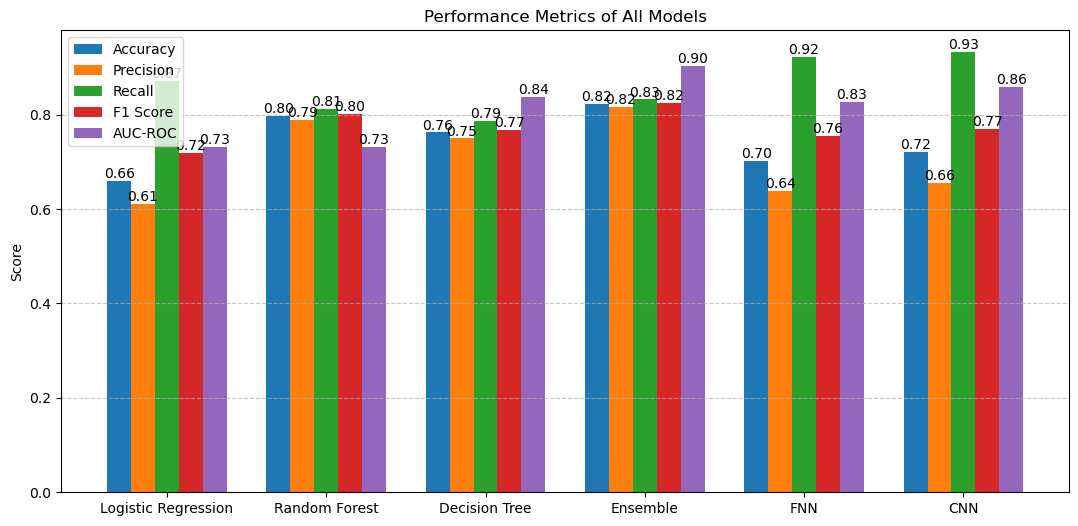

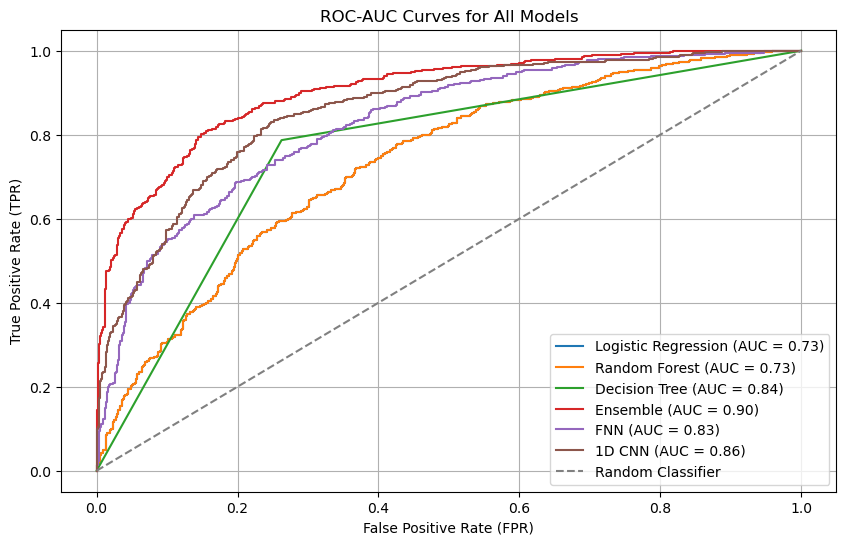

In [69]:
# Model names
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Ensemble", "FNN","CNN"]

# Performance metrics
accuracy = [accuracy_lr, accuracy_rf, accuracy_dt, accuracy_ensemble, accuracy_fnn,cnn_acc]
precision = [precision_lr, precision_rf, precision_dt, precision_ensemble, precision_fnn,cnn_precision]
recall = [recall_lr, recall_rf, recall_dt, recall_ensemble, recall_fnn,cnn_recall]
f1_score_vals = [f1_lr, f1_rf, f1_dt, f1_ensemble, f1_fnn,cnn_f1]
auc_roc = [auc_lr, auc_rf, auc_roc_dt, auc_ensemble, auc_fnn,cnn_auc]

# Plot Performance Metrics
plt.figure(figsize=(13, 6))
bar_width = 0.15
x = np.arange(len(models))

bars1 = plt.bar(x - 2*bar_width, accuracy, width=bar_width, label="Accuracy")
bars2 = plt.bar(x - bar_width, precision, width=bar_width, label="Precision")
bars3 = plt.bar(x, recall, width=bar_width, label="Recall")
bars4 = plt.bar(x + bar_width, f1_score_vals, width=bar_width, label="F1 Score")
bars5 = plt.bar(x + 2*bar_width, auc_roc, width=bar_width, label="AUC-ROC")

# Function to add labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

# Add labels to bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)
add_labels(bars5)

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Performance Metrics of All Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot ROC-AUC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_roc_dt:.2f})")
plt.plot(fpr_ensemble, tpr_ensemble, label=f"Ensemble (AUC = {auc_ensemble:.2f})")
plt.plot(fpr_fnn, tpr_fnn, label=f"FNN (AUC = {auc_fnn:.2f})")
plt.plot(fpr_cnn, tpr_cnn, label=f"1D CNN (AUC = {cnn_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curves for All Models")
plt.legend()
plt.grid()
plt.show()

In [71]:

# Model names
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Ensemble", "FNN","CNN"]

# Performance metrics
accuracy = [accuracy_lr, accuracy_rf, accuracy_dt, accuracy_ensemble, accuracy_fnn,cnn_acc]
precision = [precision_lr, precision_rf, precision_dt, precision_ensemble, precision_fnn,cnn_precision]
recall = [recall_lr, recall_rf, recall_dt, recall_ensemble, recall_fnn,cnn_recall]
f1_score_vals = [f1_lr, f1_rf, f1_dt, f1_ensemble, f1_fnn,cnn_recall]
auc_roc = [auc_lr, auc_rf, auc_roc_dt, auc_ensemble, auc_fnn,cnn_auc]

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score_vals,
    "AUC-ROC": auc_roc
})

# Display the DataFrame
from IPython.display import display
display(metrics_df)

Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0  Logistic Regression  0.659146   0.611552  0.870968  0.718563  0.731868
1        Random Forest  0.797744   0.788732  0.812903  0.800635  0.731868
2        Decision Tree  0.762288   0.749616  0.787097  0.767899  0.837241
3             Ensemble  0.822724   0.816456  0.832258  0.824281  0.902589
4                  FNN  0.701048   0.639106  0.922581  0.755116  0.827061
5                  CNN  0.721193   0.655329  0.932258  0.932258  0.858937

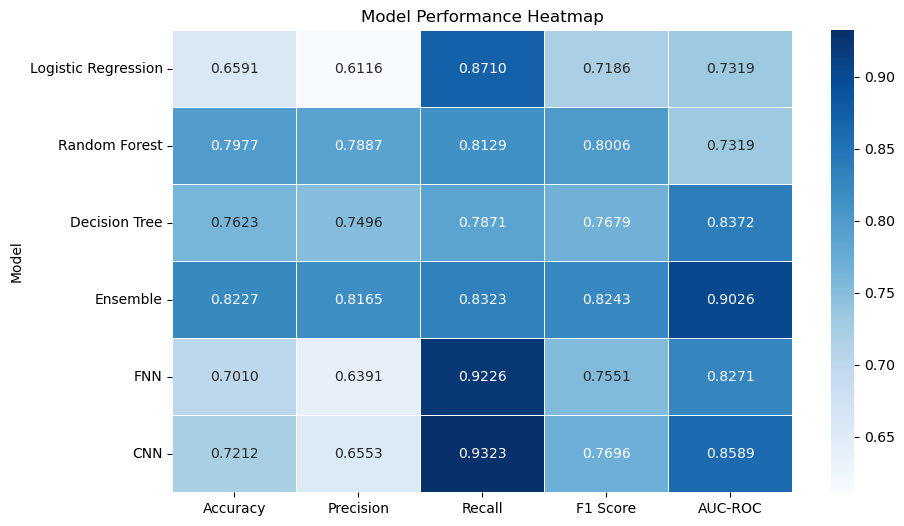

In [73]:
# Create DataFrame with model performance metrics
performance_data = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Decision Tree", "Ensemble", "FNN", "CNN"],
    "Accuracy": [accuracy_lr, accuracy_rf, accuracy_dt, accuracy_ensemble, accuracy_fnn,cnn_acc],
    "Precision": [precision_lr, precision_rf, precision_dt, precision_ensemble, precision_fnn,cnn_precision],
    "Recall": [recall_lr, recall_rf, recall_dt, recall_ensemble, recall_fnn,cnn_recall],
    "F1 Score": [f1_lr, f1_rf, f1_dt, f1_ensemble, f1_fnn,cnn_f1],
    "AUC-ROC": [auc_lr, auc_rf, auc_roc_dt, auc_ensemble, auc_fnn,cnn_auc]
})

# Convert model names as index
performance_data.set_index("Model", inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_data, annot=True, cmap="Blues", fmt=".4f", linewidths=0.5)
plt.title("Model Performance Heatmap")
plt.show()


The performance comparison of various models for predicting coronary heart disease (CHD) reveals the following insights:

- Logistic Regression: Achieved moderate accuracy (65%) and AUC-ROC (73%), with a high recall (87%) but moderate precision (61.1%).
- Random Forest: Showed the second highest accuracy (79%) and good recall (81%) and precision (78%), indicating improvement with identifying true positives.
- Decision Tree: Had an accuracy of 76% and AUC-ROC of 83%.
- Ensemble: Provided high accuracy (82%) and recall (83%) and precision (81%).
- FNN (Feedforward Neural Network): Demonstrated a very high recall (92%) but lower accuracy (70%) with better precision (82%).
- 1D CNN (Convolutional Neural Network): Balanced performance with the highest recall (93.23%) and F1 score (76%), making it the most reliable model for identifying true positive cases.

Overall, the CNN model was chosen for its balanced performance across key metrics, particularly its high recall and F1 score, which are crucial for medical diagnostics.

#### 7.2 Computational Efficiency
Computational efficiency is a critical aspect of model evaluation, especially when dealing with large datasets or complex models. It involves measuring the time taken for training and prediction, as well as the computational resources required. Efficient models are not only faster but also more cost-effective, making them suitable for real-time applications. In this context, we measure the training time to understand how quickly the model can learn from the data and the prediction time to assess how fast it can make predictions on new data. These metrics are essential for deploying models in environments where quick decision-making is crucial, such as in clinical settings.

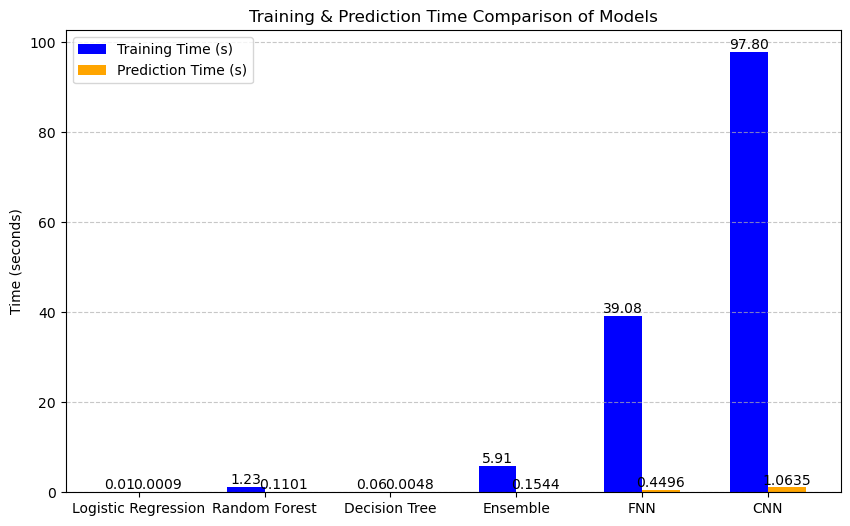

In [75]:
# Model names
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Ensemble", "FNN","CNN"]

# Training times and Prediction times
training_times = [train_time_lr, train_time_rf, train_time_dt, train_time_ensemble, train_time_fnn,training_time ]
prediction_times = [pred_time_lr, pred_time_rf, pred_time_dt, pred_time_ensemble, pred_time_fnn,prediction_time ]

# Create a bar plot
x = np.arange(len(models))
bar_width = 0.3

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, training_times, width=bar_width, label="Training Time (s)", color='blue')
plt.bar(x + bar_width/2, prediction_times, width=bar_width, label="Prediction Time (s)", color='orange')

# Add labels on top of bars
for i in range(len(models)):
    plt.text(i - bar_width/2, training_times[i] + 0.01, f"{training_times[i]:.2f}", ha='center', va='bottom', fontsize=10)
    plt.text(i + bar_width/2, prediction_times[i] + 0.01, f"{prediction_times[i]:.4f}", ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.xticks(x, models)
plt.ylabel("Time (seconds)")
plt.title("Training & Prediction Time Comparison of Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Based on this bargraph, it is evident that deep learning models take longer time for training compared to traditional ML models. This is due to the feature extraction and learning using complex architecture. CNN took the longest to train with 97 seconds, whereas Logistic Regression was the fastest (0.01s)

#### 7.3 External Data Validation
External data validation is the process of evaluating the model on a completely independent dataset that was not used during training or initial validation. This step is crucial to ensure that the model generalizes well to new, unseen data and is not overfitted to the training dataset. In this case, we use the UCI Heart Disease dataset for external validation. The process involves loading and preprocessing the UCI dataset, mapping its features to match the format expected by our model, and then evaluating the model's performance on this external dataset. This validation helps in assessing the robustness and reliability of the model in real-world scenarios.

**Data Loading and preprocessing**
Inspecting the model's input shape is a preliminary step to ensure that the data fed into the model is in the correct format. This function loads the TensorFlow model and prints the expected input shape, which helps in verifying that the number of features in the dataset matches the model's requirements. This step is crucial for avoiding shape mismatches that can lead to errors during model evaluation.<br>

Loading and preprocessing the UCI Heart Disease dataset involves reading the data from an Excel file, converting the target variable to a binary format, and removing rows with missing values. This ensures that the dataset is clean and ready for evaluation. The function handles exceptions to provide informative error messages in case of issues during data loading.<br>

**Mapping UCI Features to FRS Format**<br>
Mapping the UCI dataset features to match the Framingham Risk Score (FRS) dataset format involves creating a new dataframe with the required features. This includes direct mappings, derived features, and placeholder features. This step ensures that the external dataset has the same structure as the training dataset, allowing for a fair evaluation of the model.<br>

**Evaluating TensorFlow Model**<br>
Evaluating the TensorFlow model involves predicting the probabilities of the test set, converting these probabilities to binary predictions using a threshold, and calculating various performance metrics. These metrics include accuracy, precision, recall, F1-score, and ROC AUC. The confusion matrix is also computed to provide a detailed view of the model's performance.<br>

**Performing External Validation- Performance evaluation**<br>
The results are displayed, including various performance metrics and the confusion matrix. The ROC curve is also plotted to visualize the model's performance on the external dataset.


Inspecting TensorFlow model...


Model expects input shape: (None, 14)
Number of features expected: 14

Performing external validation...
UCI dataset loaded successfully with 303 records after removing missing values.
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step 

External Validation Results on UCI Dataset:
Accuracy: 0.7393
Precision: 0.6948
Recall: 0.7698
F1: 0.7304
Roc_auc: 0.7894


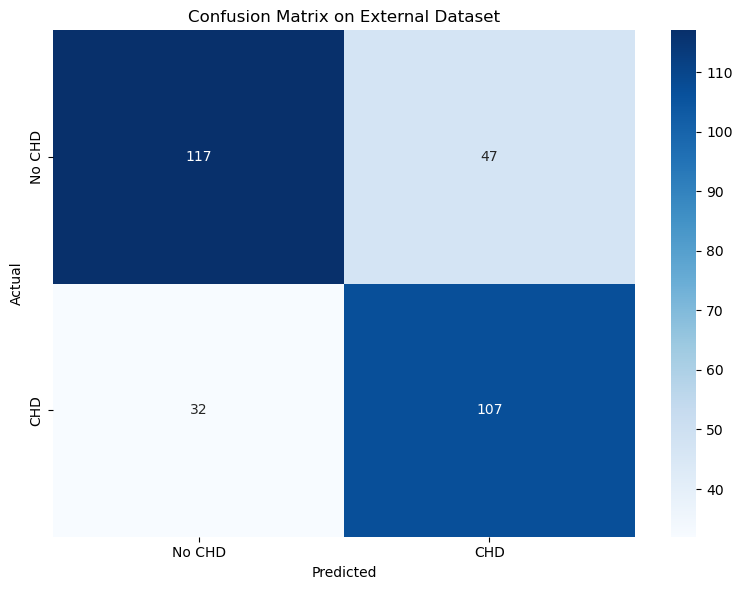

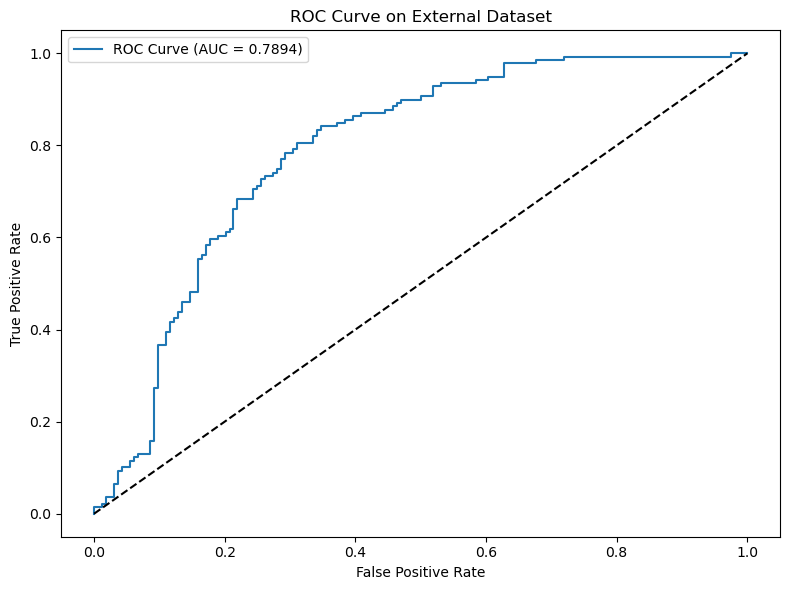


Validation completed successfully.


In [77]:
# Function to inspect model input shape
def inspect_tf_model(model_path):
    """Inspect the input shape of the TensorFlow model"""
    model = tf.keras.models.load_model(model_path)
    input_shape = model.input_shape
    print(f"Model expects input shape: {input_shape}")
    num_features = input_shape[-1]
    print(f"Number of features expected: {num_features}")
    return model, num_features

# Load UCI Heart Disease dataset
def load_uci_dataset():
    """Load and preprocess the UCI Heart Disease dataset."""
    try:
        # Load the dataset from Excel file
        uci_data = pd.read_excel("data/Heart Disease Dataset 4.xlsx")
        
        # Convert target to binary (0 = no disease, 1 = disease)
        uci_data['num'] = uci_data['num'].apply(lambda x: 1 if x > 0 else 0)
        
        # Remove rows with missing values
        uci_data = uci_data.dropna()
        
        print(f"UCI dataset loaded successfully with {len(uci_data)} records after removing missing values.")
        return uci_data
    except Exception as e:
        print(f"Error loading UCI dataset: {e}")
        return None

# Function to map UCI features to FRS format
def map_uci_to_frs(uci_data, num_features=14):
    """Map UCI dataset features to match FRS dataset format."""
    # Create mapping dataframe
    mapped_data = pd.DataFrame()
    
    # Direct mappings
    mapped_data['age'] = uci_data['age']
    mapped_data['male'] = uci_data['sex']
    mapped_data['totChol'] = uci_data['chol']
    mapped_data['sysBP'] = uci_data['trestbps']
    mapped_data['heartRate'] = uci_data['thalach']
    mapped_data['diabetes'] = uci_data['fbs']
    
    # Add more features as needed
    mapped_data['cp'] = uci_data['cp']
    mapped_data['exang'] = uci_data['exang']
    mapped_data['oldpeak'] = uci_data['oldpeak']
    mapped_data['slope'] = uci_data['slope']
    
    # Derived features
    mapped_data['BPMeds'] = np.where(uci_data['trestbps'] > 140, 1, 0)
    mapped_data['prevalentHyp'] = np.where(uci_data['trestbps'] > 140, 1, 0)
    
    # Placeholder features
    mapped_data['education'] = 1.0
    mapped_data['prevalentStroke'] = 0
    
    # Add target variable
    mapped_data['TenYearCHD'] = uci_data['num']
    
    return mapped_data

# Evaluation function for TensorFlow model
def evaluate_tf_model(model, X_test, y_test):
    """Evaluate TensorFlow model performance with various metrics."""
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.4).astype(int)
    
    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    cm = confusion_matrix(y_test, y_pred)
    return results, cm, y_pred, y_pred_proba

# Function to perform external validation
def perform_external_validation(model, num_features):
    # Load UCI data
    uci_data = load_uci_dataset()
    if uci_data is None:
        return None, None
    
    # Map UCI features to match the expected number of features
    mapped_data = map_uci_to_frs(uci_data, num_features)
    
    # Separate features and target
    X_external = mapped_data.drop('TenYearCHD', axis=1)
    y_external = mapped_data['TenYearCHD']
    
    # Scale the features
    scaler = StandardScaler()
    X_external_scaled = scaler.fit_transform(X_external)
    
    # Evaluate the model
    results, cm, y_pred, y_pred_proba = evaluate_tf_model(model, X_external_scaled, y_external)
    
    # Display results
    print("\nExternal Validation Results on UCI Dataset:")
    for metric, value in results.items():
        print(f"{metric.capitalize()}: {value:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No CHD', 'CHD'], 
                yticklabels=['No CHD', 'CHD'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix on External Dataset')
    plt.tight_layout()
    plt.savefig('confusion_matrix_external.png')
    plt.show()
    
    # Plot ROC curve
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_external, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {results["roc_auc"]:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve on External Dataset')
    plt.legend()
    plt.tight_layout()
    plt.savefig('roc_curve_external.png')
    plt.show()
    
    return results, mapped_data

# Main execution
if __name__ == "__main__":
    try:
        print("Inspecting TensorFlow model...")
        model, num_features = inspect_tf_model('cnn_model.h5')
        
        print("\nPerforming external validation...")
        results, mapped_data = perform_external_validation(model, num_features)
        
        if results:
            print("\nValidation completed successfully.")
        else:
            print("\nValidation failed.")
        
    except Exception as e:
        print(f"\nError during validation: {e}")
        import traceback
        traceback.print_exc()

The external validation of the model on the UCI Heart Disease dataset provides a comprehensive assessment of its performance and generalizability. 

- Accuracy (73.93%): The model correctly classified approximately 74% of the instances in the external dataset. This indicates a strong overall performance, suggesting that the model can reliably predict the presence of heart disease in new patients.

- Precision (69.48%): With a precision score of nearly 70%, the model demonstrates its ability to correctly identify positive cases (patients with heart disease) while minimizing false positives. This is crucial in medical diagnostics to avoid unnecessary treatments and anxiety for patients.

- Recall (76.98%): The recall score of almost 77% shows that the model is effective in identifying the majority of actual positive cases. High recall is essential in healthcare to ensure that most patients with heart disease are correctly diagnosed and receive timely intervention.

- F1-Score (73.04%): The F1-score, which balances precision and recall, is around 73%. This indicates that the model maintains a good equilibrium between identifying true positive cases and minimizing false positives, making it reliable for practical use.

- ROC AUC (78.94%): The ROC AUC score of nearly 79% reflects the model's ability to distinguish between patients with and without heart disease. A high AUC value indicates strong discriminatory power, which is vital for effective screening and diagnosis.

Overall Insights
The external validation results demonstrate that the model performs well on an independent dataset, confirming its robustness and generalizability. The balanced performance across various metrics highlights the model's reliability and effectiveness in predicting heart disease. These results provide confidence that the model can be used in real-world clinical settings to assist healthcare professionals in early diagnosis and intervention, ultimately improving patient outcomes.

## 8. Explainable AI
Explainable AI (XAI) refers to methods and techniques that make the predictions of machine learning models understandable to humans. The aim of XAI is to provide transparency, enabling users to comprehend how decisions are made by the model. This is particularly important in fields like healthcare, where understanding the rationale behind a prediction can be crucial for trust and accountability.

Key aspects of XAI include:
- Interpretability: The ability to explain how a model makes its predictions. This can involve visualizing feature importance, decision paths, or using simpler surrogate models to approximate complex models.
- Transparency: Ensuring that the model's workings are open and understandable. This can help in identifying biases, errors, and areas for improvement.
- Trust: Building confidence in the model's predictions by providing clear and understandable explanations. This is essential for user acceptance, especially in critical applications like medical diagnosis.

### SHAP (SHapley Additive exPlanations) 
It is a game theoretic approach to explain the output of a predicitve model. It helps to overcome the 'Blackbox issue' in deep learning models by providing insights on how each feature influences the prediction.

This plot presents SHAP (SHapley Additive exPlanations) summary values, which visualize how different features contribute to the model’s prediction. Each point represents the magnitude and direction of impact on the model’s output. Features such as age, systolic blood pressure (sysBP), and cigarettes per day have the highest influence on cardiovascular disease (CVD) predictions, whereas variables like diabetes and prevalent stroke have minimal impact.

PermutationExplainer explainer: 733it [09:17,  1.30it/s]                         


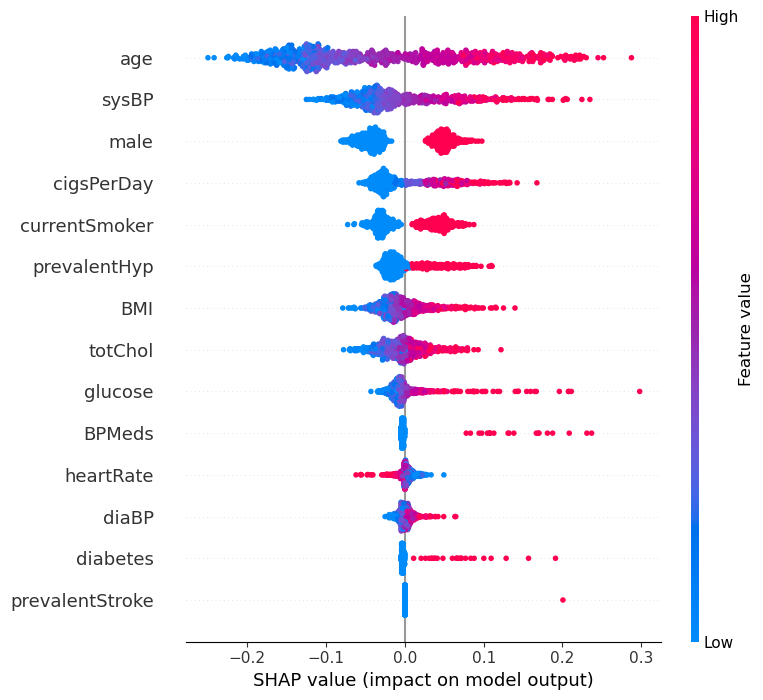

In [135]:
#SHAP
# Load the trained model and scaler
model = tf.keras.models.load_model("cnn_model.h5")
scaler = joblib.load("scaler_framingham.pkl")


# Initialize SHAP Explainer on the Full Dataset
explainer = shap.Explainer(model, X_train)

# Compute SHAP Values for the entire dataset
shap_values = explainer(X_test)

# Global SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, features=X_test, feature_names=X.columns)

plt.show()


### LIME  (Local Interpretable Model-agnostic Explanations)
LIME is a popular XAI method that offers local, interpretable explanations for individual predictions made by the predictive model.

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


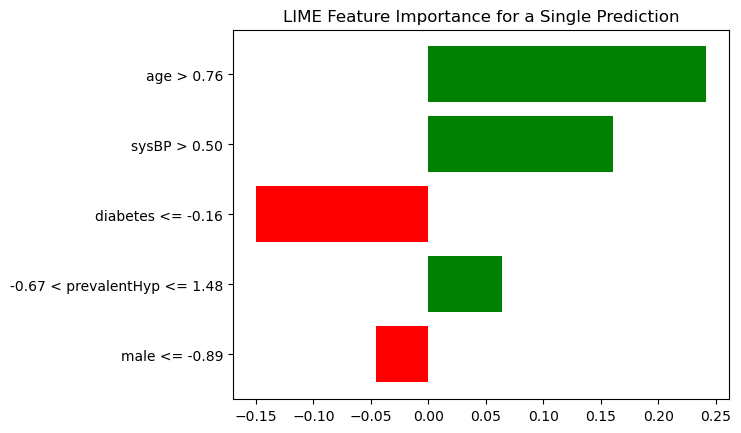

In [21]:

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,  # Use the training data for reference
    feature_names=X.columns,  # Column names
    class_names=["No CVD", "CVD"],  # Binary classification labels
    mode='classification'
)
idx = np.random.randint(0, X_test.shape[0])  # Pick a random test instance
sample = X_test[idx].reshape(1, -1)  # Reshape for prediction

def predict_fn(data):
    prob_1 = fnn_model.predict(data)  # Probability for class 1
    prob_0 = 1 - prob_1  # Compute probability for class 0
    return np.hstack((prob_0, prob_1))  # Return array with both class probabilities
exp = explainer.explain_instance(sample.flatten(), predict_fn, num_features=5)
fig = exp.as_pyplot_figure()
plt.title("LIME Feature Importance for a Single Prediction")
plt.show()


This plot displays LIME (Local Interpretable Model-Agnostic Explanations) results, which explain feature importance for a single prediction instance. Positive contributions (green bars) indicate features pushing the model towards predicting CVD, while negative contributions (red bars) reduce the likelihood of CVD classification. In this instance, age and systolic blood pressure strongly support a CVD prediction, whereas diabetes and male gender negatively impact the classification.

## 9. Conclusion

By employing SMOTE, the overall effectiveness of the model was significantly improved, as it helped address the issue of class imbalance. This technique generates synthetic samples for the minority class, thereby providing a more balanced dataset for training. The resulting model benefits from a better representation of all classes, leading to enhanced performance metrics.

However, it is essential to consider the potential downsides of modifying the dataset with synthetic data. Therefore, the original notebook is evaluated and the final model is developed based on it, which retains the original dataset without applying SMOTE. This approach ensures that the model remains true to the original data distribution and avoids any potential biases introduced by synthetic sampling.
